In [366]:
!pip install nltk

In [367]:
!pip install scikit-learn


In [368]:
!pip install --upgrade pip setuptools wheel


In [369]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [370]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/Jadukor-Humayun Ahmed.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-Humayun Ahmed.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

আজ হাফ ইয়ারলি পরীক্ষার অংক খাতা দিয়েছে।

বাবলু পেয়েছে সাড়ে আট। শুধু তাই নয়, খাতার উপর লাল পেনসিল দিয়ে ধীরেন স্যার
বড় বড় করে লিখে দিয়েছেন, গবু। কী সর্বনাশ!

বাবলু খাতা উল্টে রাখল। যাতে গবু লেখাটা কারো চোখে না পড়ে। কিন্তু ধীরেন স্যার
মেঘস্বরে বললেন, এই, বেঞ্চির উপর উঠে দাঁড়া।

বাবুল বেঞ্চির উপর উঠে দাঁড়াল। তোর অংক খাতায় কী লিখে দিয়েছি সবাইকে দেখা।

সে মুখ কালো করে সবাইকে দেখাল খাতাটা। ফাস্ট বেঞ্চে বসা কয়েকজন ভ্যাকভ্যাক

করে হেসে ফেলল। ধীরেন স্যার গর্জন করে উঠলেন। গ্যাই, কে হাসে! মুখ সেলাই করে
দেব।

হাসি বন্ধ হয়ে গেল সঙ্গে সঙ্গে। ধীরেন স্যারকে সবাই যমের মতো ভয় করে। আড়ালে
ডাকে যম স্যার। ফার্স্ট বেঞ্চে আবার একটু খিকখিক শব্দ হল। ধীরেন স্যার হুংকার দিয়ে
উঠলেন। আরেকবার হাসির শব্দ শুনলে চড় দিয়ে দাঁত খুলে ফেলব। নাট্যশালা নাকি?
এ?

ক্লাস পুরোপুরি নিঃশব্দ হয়ে গেল। ধীরেন স্যার থমথমে গলায় বললেন, এ্াই বাবলু, তুই
ঘণ্টা না পড়া পর্যন্ত বেঞ্চির উপর দাঁড়িয়ে থাকবি।


বাবলু উদাস চোখে জানালা দিয়ে বাইরে তাকিয়ে রইল। বেঞ্ির উপর এক ঘণ্টা দাঁড়িয়ে
থাকা তেমন কিছু না। কিন্তু বাসায় ফিরে

In [371]:
def bangla_sentence_tokenize(human_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences = human_written_text.split('।')
    sentences = human_written_text.split('\n\n')
    sentences = human_written_text.split('\n')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

In [372]:
def bangla_word_tokenize(human_written_text):
    # Split words by spaces
    words = human_written_text.split()

    # Remove any leading/trailing whitespace and filter out empty strings
    words = [word.strip() for word in words if word.strip()]

    # Print the total number of words
    total_words = len(words)
    print(f"Total number of words: {total_words}")

    return words, total_words  # Also returning the total number of words


In [373]:
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    # Tokenize words using the custom function
    words, total_words = bangla_word_tokenize(human_written_text) # Modified to correctly capture the two return values

    return words, total_words, sentences # Added total_words to the return statement


words, total_words, sentences = preprocess_text(human_written_text)
print(words)
print(total_words)
print(sentences)

Total number of words: 1586
['আজ', 'হাফ', 'ইয়ারলি', 'পরীক্ষার', 'অংক', 'খাতা', 'দিয়েছে।', 'বাবলু', 'পেয়েছে', 'সাড়ে', 'আট।', 'শুধু', 'তাই', 'নয়', 'খাতার', 'উপর', 'লাল', 'পেনসিল', 'দিয়ে', 'ধীরেন', 'স্যার', 'বড়', 'বড়', 'করে', 'লিখে', 'দিয়েছেন', 'গবু।', 'কী', 'সর্বনাশ', 'বাবলু', 'খাতা', 'উল্টে', 'রাখল।', 'যাতে', 'গবু', 'লেখাটা', 'কারো', 'চোখে', 'না', 'পড়ে।', 'কিন্তু', 'ধীরেন', 'স্যার', 'মেঘস্বরে', 'বললেন', 'এই', 'বেঞ্চির', 'উপর', 'উঠে', 'দাঁড়া।', 'বাবুল', 'বেঞ্চির', 'উপর', 'উঠে', 'দাঁড়াল।', 'তোর', 'অংক', 'খাতায়', 'কী', 'লিখে', 'দিয়েছি', 'সবাইকে', 'দেখা।', 'সে', 'মুখ', 'কালো', 'করে', 'সবাইকে', 'দেখাল', 'খাতাটা।', 'ফাস্ট', 'বেঞ্চে', 'বসা', 'কয়েকজন', 'ভ্যাকভ্যাক', 'করে', 'হেসে', 'ফেলল।', 'ধীরেন', 'স্যার', 'গর্জন', 'করে', 'উঠলেন।', 'গ্যাই', 'কে', 'হাসে', 'মুখ', 'সেলাই', 'করে', 'দেব।', 'হাসি', 'বন্ধ', 'হয়ে', 'গেল', 'সঙ্গে', 'সঙ্গে।', 'ধীরেন', 'স্যারকে', 'সবাই', 'যমের', 'মতো', 'ভয়', 'করে।', 'আড়ালে', 'ডাকে', 'যম', 'স্যার।', 'ফার্স্ট', 'বেঞ্চে', 'আবার', 'একটু', 'খিকখিক', 'শব্দ', 

In [374]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/Jadukor-Humayun Ahmed.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-Humayun Ahmed.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

আজ হাফ ইয়ারলি পরীক্ষার অংক খাতা দিয়েছে।

বাবলু পেয়েছে সাড়ে আট। শুধু তাই নয়, খাতার উপর লাল পেনসিল দিয়ে ধীরেন স্যার
বড় বড় করে লিখে দিয়েছেন, গবু। কী সর্বনাশ!

বাবলু খাতা উল্টে রাখল। যাতে গবু লেখাটা কারো চোখে না পড়ে। কিন্তু ধীরেন স্যার
মেঘস্বরে বললেন, এই, বেঞ্চির উপর উঠে দাঁড়া।

বাবুল বেঞ্চির উপর উঠে দাঁড়াল। তোর অংক খাতায় কী লিখে দিয়েছি সবাইকে দেখা।

সে মুখ কালো করে সবাইকে দেখাল খাতাটা। ফাস্ট বেঞ্চে বসা কয়েকজন ভ্যাকভ্যাক

করে হেসে ফেলল। ধীরেন স্যার গর্জন করে উঠলেন। গ্যাই, কে হাসে! মুখ সেলাই করে
দেব।

হাসি বন্ধ হয়ে গেল সঙ্গে সঙ্গে। ধীরেন স্যারকে সবাই যমের মতো ভয় করে। আড়ালে
ডাকে যম স্যার। ফার্স্ট বেঞ্চে আবার একটু খিকখিক শব্দ হল। ধীরেন স্যার হুংকার দিয়ে
উঠলেন। আরেকবার হাসির শব্দ শুনলে চড় দিয়ে দাঁত খুলে ফেলব। নাট্যশালা নাকি?
এ?

ক্লাস পুরোপুরি নিঃশব্দ হয়ে গেল। ধীরেন স্যার থমথমে গলায় বললেন, এ্াই বাবলু, তুই
ঘণ্টা না পড়া পর্যন্ত বেঞ্চির উপর দাঁড়িয়ে থাকবি।


বাবলু উদাস চোখে জানালা দিয়ে বাইরে তাকিয়ে রইল। বেঞ্ির উপর এক ঘণ্টা দাঁড়িয়ে
থাকা তেমন কিছু না। কিন্তু বাসায় ফিরে

In [375]:
!pip install BnLemma

In [376]:
import BnLemma as lm
import string

# Define a list of Bangla stop words (you can extend this list as needed)
bangla_stop_words = ['এ', 'ও', 'আছে', 'থেকে', 'কিন্তু', 'যা', 'যে', 'এবং', 'এই', 'ওই', 'হয়', 'সে', 'আমি', 'আমরা', 'তুমি', 'তারা']

# Function to tokenize and lemmatize Bangla sentences
def bangla_sentence_tokenize(human_written_text):
    # Initialize the BnLemma lemmatizer
    bl = lm.Lemmatizer()

    # Split sentences by full stop (।) and newline characters
    sentences = human_written_text.split('।')
    sentences = [sentence for sublist in [s.split('\n\n') for s in sentences] for sentence in sublist]
    sentences = [sentence for sublist in [s.split('\n') for s in sentences] for sentence in sublist]

    # Strip and filter empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Lemmatize each sentence, avoiding empty or problematic sentences
    lemmatized_sentences = []
    for sentence in sentences:
        if sentence:  # Ensure sentence is not empty
            try:
                lemmatized_sentence = bl.lemma(sentence)
                lemmatized_sentences.append(lemmatized_sentence)
            except KeyError as e:
                print(f"Error lemmatizing sentence: {sentence}, skipping. Error: {e}")

    # Return the list of lemmatized sentences
    return lemmatized_sentences

# Function to remove stop words and count words
def remove_stop_words(sentences):
    # Lists to hold sentences after stop word removal
    cleaned_sentences = []

    # Initialize counters
    total_words = 0
    remaining_words = 0
    total_removed_words = 0

    # Total number of sentences
    total_sentences = len(sentences)

    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = sentence.split()

        # Count the total number of words
        total_words += len(words)

        # Remove stop words from the sentence
        filtered_words = [word for word in words if word not in bangla_stop_words]

        # Count the number of removed stop words
        removed_words_count = len(words) - len(filtered_words)
        total_removed_words += removed_words_count

        # Count the number of remaining words after removing stop words
        remaining_words += len(filtered_words)

        # Join the words back into a cleaned sentence
        cleaned_sentence = ' '.join(filtered_words)

        # Add the cleaned sentence to the list
        cleaned_sentences.append(cleaned_sentence)

    # Print the cleaned sentences
    print("Cleaned Sentences:", cleaned_sentences)

    # Print total and remaining word counts
    print(f"Total words: {total_words}")
    print(f"Remaining words after stop word removal: {remaining_words}")
    print(f"Total stop words removed: {total_removed_words}")
    print(f"Total sentences: {total_sentences}")

    return cleaned_sentences

# Preprocessing function to remove punctuation and lemmatize
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to adjust for Bangla-specific punctuation)
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize and lemmatize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    return sentences


# Preprocess the text
sentences = preprocess_text(human_written_text)
# Remove stop words from the sentences and print results
cleaned_sentences = remove_stop_words(sentences)


Error lemmatizing sentence: রাগী গলায় বললেন এই বয়সে বদরামি, skipping. Error: ''
Cleaned Sentences: ['আজ হাফ ইয়ারলি পরীক্ষা অংক খাতা দিয়েছে', 'বাবলা পেয়েছে সাড়ে আট', 'শুধু তাই নয় খাতা উপর লাল পেনসিল দেওয়া ধীর যার', 'বড় বড় করা লিখে দিয়েছেন গবু', 'কী সর্বনাশ', 'বাবলা খাতা উল্টে খল', 'যাতা গবু লেখাপড়া কারো চোখ না পড়ে', 'ধীর যার', 'স্বর লেন বেঞ্চ উপর উঠে দাঁড়া', 'বাবু বেঞ্চ উপর উঠে দাঁড়া', 'আপনার অংক খাতা কী লিখে দিয়েছি সবাই দেখা', 'মুখ কালো করা সবাই দেখা খাতা', 'ফাস্ট বেঞ্চ বসা কয়েকজন ভ্যাকসিন', 'করা ফেল', 'ধীর যার গর্জন করা লেন', 'গ্যাঁট কে হাস মুখ সেলাই করা', 'দেব', 'হাসি বন্ধ হ গেল সঙ্গে সঙ্গে', 'ধীর স্যার সবাই যম মত ভয় করা', 'আড়ালে', 'ডাক যম যার', 'ফার্স্ট বেঞ্চ আবার একটু খিকখিক শব্দ হওয়া', 'ধীর যার হুংকার দেওয়া', 'লেন', 'আরেক হাসি শব্দ শুনা চড় দেওয়া দাঁত খোলা ফেল', 'নাট্য নাকি', '', 'ক্লাস পুরো নিঃশব্দ হ গেল', 'ধীর যার থমথম গলা লেন বাবলা আপনি', 'ঘণ্টা না পড়া পর্যন্ত বেঞ্চ উপর দাঁড়ি থাক', 'বাবলা দাস চোখ জানাজা দেওয়া বাই তাক রইল', 'বেঞ্ির উপর এক ঘণ্টা দাঁড়ি', 'থাকা 

In [377]:
from itertools import combinations

# Function to create word pairs from a cleaned sentence
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")


create_word_pairs(cleaned_sentences)


Sentence: 'আজ হাফ ইয়ারলি পরীক্ষা অংক খাতা দিয়েছে'
Word Pairs: [('আজ', 'হাফ'), ('আজ', 'ইয়ারলি'), ('আজ', 'পরীক্ষা'), ('আজ', 'অংক'), ('আজ', 'খাতা'), ('আজ', 'দিয়েছে'), ('হাফ', 'ইয়ারলি'), ('হাফ', 'পরীক্ষা'), ('হাফ', 'অংক'), ('হাফ', 'খাতা'), ('হাফ', 'দিয়েছে'), ('ইয়ারলি', 'পরীক্ষা'), ('ইয়ারলি', 'অংক'), ('ইয়ারলি', 'খাতা'), ('ইয়ারলি', 'দিয়েছে'), ('পরীক্ষা', 'অংক'), ('পরীক্ষা', 'খাতা'), ('পরীক্ষা', 'দিয়েছে'), ('অংক', 'খাতা'), ('অংক', 'দিয়েছে'), ('খাতা', 'দিয়েছে')]
Number of pairs: 21

Sentence: 'বাবলা পেয়েছে সাড়ে আট'
Word Pairs: [('বাবলা', 'পেয়েছে'), ('বাবলা', 'সাড়ে'), ('বাবলা', 'আট'), ('পেয়েছে', 'সাড়ে'), ('পেয়েছে', 'আট'), ('সাড়ে', 'আট')]
Number of pairs: 6

Sentence: 'শুধু তাই নয় খাতা উপর লাল পেনসিল দেওয়া ধীর যার'
Word Pairs: [('শুধু', 'তাই'), ('শুধু', 'নয়'), ('শুধু', 'খাতা'), ('শুধু', 'উপর'), ('শুধু', 'লাল'), ('শুধু', 'পেনসিল'), ('শুধু', 'দেওয়া'), ('শুধু', 'ধীর'), ('শুধু', 'যার'), ('তাই', 'নয়'), ('তাই', 'খাতা'), ('তাই', 'উপর'), ('তাই', 'লাল'), ('তাই', 'পেনসিল'), ('তাই'

In [378]:
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Print the frequency of each pair if frequency > 1
    print("Pairs with Frequency > 1:")
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only print if frequency is greater than 1
            print(f"Pair: {pair}, Frequency: {frequency}")

check_pair_frequency(cleaned_sentences)  # Call the function



Pairs with Frequency > 1:
Pair: ('অংক', 'খাতা'), Frequency: 2
Pair: ('বাবলা', 'সাড়ে'), Frequency: 2
Pair: ('বাবলা', 'আট'), Frequency: 2
Pair: ('সাড়ে', 'আট'), Frequency: 3
Pair: ('খাতা', 'উপর'), Frequency: 4
Pair: ('খাতা', 'দেওয়া'), Frequency: 2
Pair: ('ধীর', 'যার'), Frequency: 8
Pair: ('বড়', 'বড়'), Frequency: 2
Pair: ('বড়', 'করা'), Frequency: 4
Pair: ('বড়', 'লিখে'), Frequency: 2
Pair: ('বড়', 'দিয়েছেন'), Frequency: 2
Pair: ('বড়', 'গবু'), Frequency: 2
Pair: ('বাবলা', 'খাতা'), Frequency: 2
Pair: ('স্বর', 'লেন'), Frequency: 2
Pair: ('বেঞ্চ', 'উপর'), Frequency: 3
Pair: ('বেঞ্চ', 'উঠে'), Frequency: 2
Pair: ('বেঞ্চ', 'দাঁড়া'), Frequency: 2
Pair: ('উপর', 'উঠে'), Frequency: 2
Pair: ('উপর', 'দাঁড়া'), Frequency: 2
Pair: ('উঠে', 'দাঁড়া'), Frequency: 2
Pair: ('আপনার', 'কী'), Frequency: 3
Pair: ('অংক', 'কী'), Frequency: 2
Pair: ('সবাই', 'দেখা'), Frequency: 2
Pair: ('মুখ', 'কালো'), Frequency: 4
Pair: ('মুখ', 'করা'), Frequency: 6
Pair: ('কালো', 'করা'), Frequency: 5
Pair: ('করা', 'দেখা'), F

In [379]:
pip install networkx matplotlib


# EDGES BETWEEN THE NODES THAT ARE NOT REPEATED IN A SENTENCE

Sentence: 'আজ হাফ ইয়ারলি পরীক্ষা অংক খাতা দিয়েছে'
Word Pairs: [('আজ', 'হাফ'), ('আজ', 'ইয়ারলি'), ('আজ', 'পরীক্ষা'), ('আজ', 'অংক'), ('আজ', 'খাতা'), ('আজ', 'দিয়েছে'), ('হাফ', 'ইয়ারলি'), ('হাফ', 'পরীক্ষা'), ('হাফ', 'অংক'), ('হাফ', 'খাতা'), ('হাফ', 'দিয়েছে'), ('ইয়ারলি', 'পরীক্ষা'), ('ইয়ারলি', 'অংক'), ('ইয়ারলি', 'খাতা'), ('ইয়ারলি', 'দিয়েছে'), ('পরীক্ষা', 'অংক'), ('পরীক্ষা', 'খাতা'), ('পরীক্ষা', 'দিয়েছে'), ('অংক', 'খাতা'), ('অংক', 'দিয়েছে'), ('খাতা', 'দিয়েছে')]
Number of pairs: 21

Sentence: 'বাবলা পেয়েছে সাড়ে আট'
Word Pairs: [('বাবলা', 'পেয়েছে'), ('বাবলা', 'সাড়ে'), ('বাবলা', 'আট'), ('পেয়েছে', 'সাড়ে'), ('পেয়েছে', 'আট'), ('সাড়ে', 'আট')]
Number of pairs: 6

Sentence: 'শুধু তাই নয় খাতা উপর লাল পেনসিল দেওয়া ধীর যার'
Word Pairs: [('শুধু', 'তাই'), ('শুধু', 'নয়'), ('শুধু', 'খাতা'), ('শুধু', 'উপর'), ('শুধু', 'লাল'), ('শুধু', 'পেনসিল'), ('শুধু', 'দেওয়া'), ('শুধু', 'ধীর'), ('শুধু', 'যার'), ('তাই', 'নয়'), ('তাই', 'খাতা'), ('তাই', 'উপর'), ('তাই', 'লাল'), ('তাই', 'পেনসিল'), ('তাই'

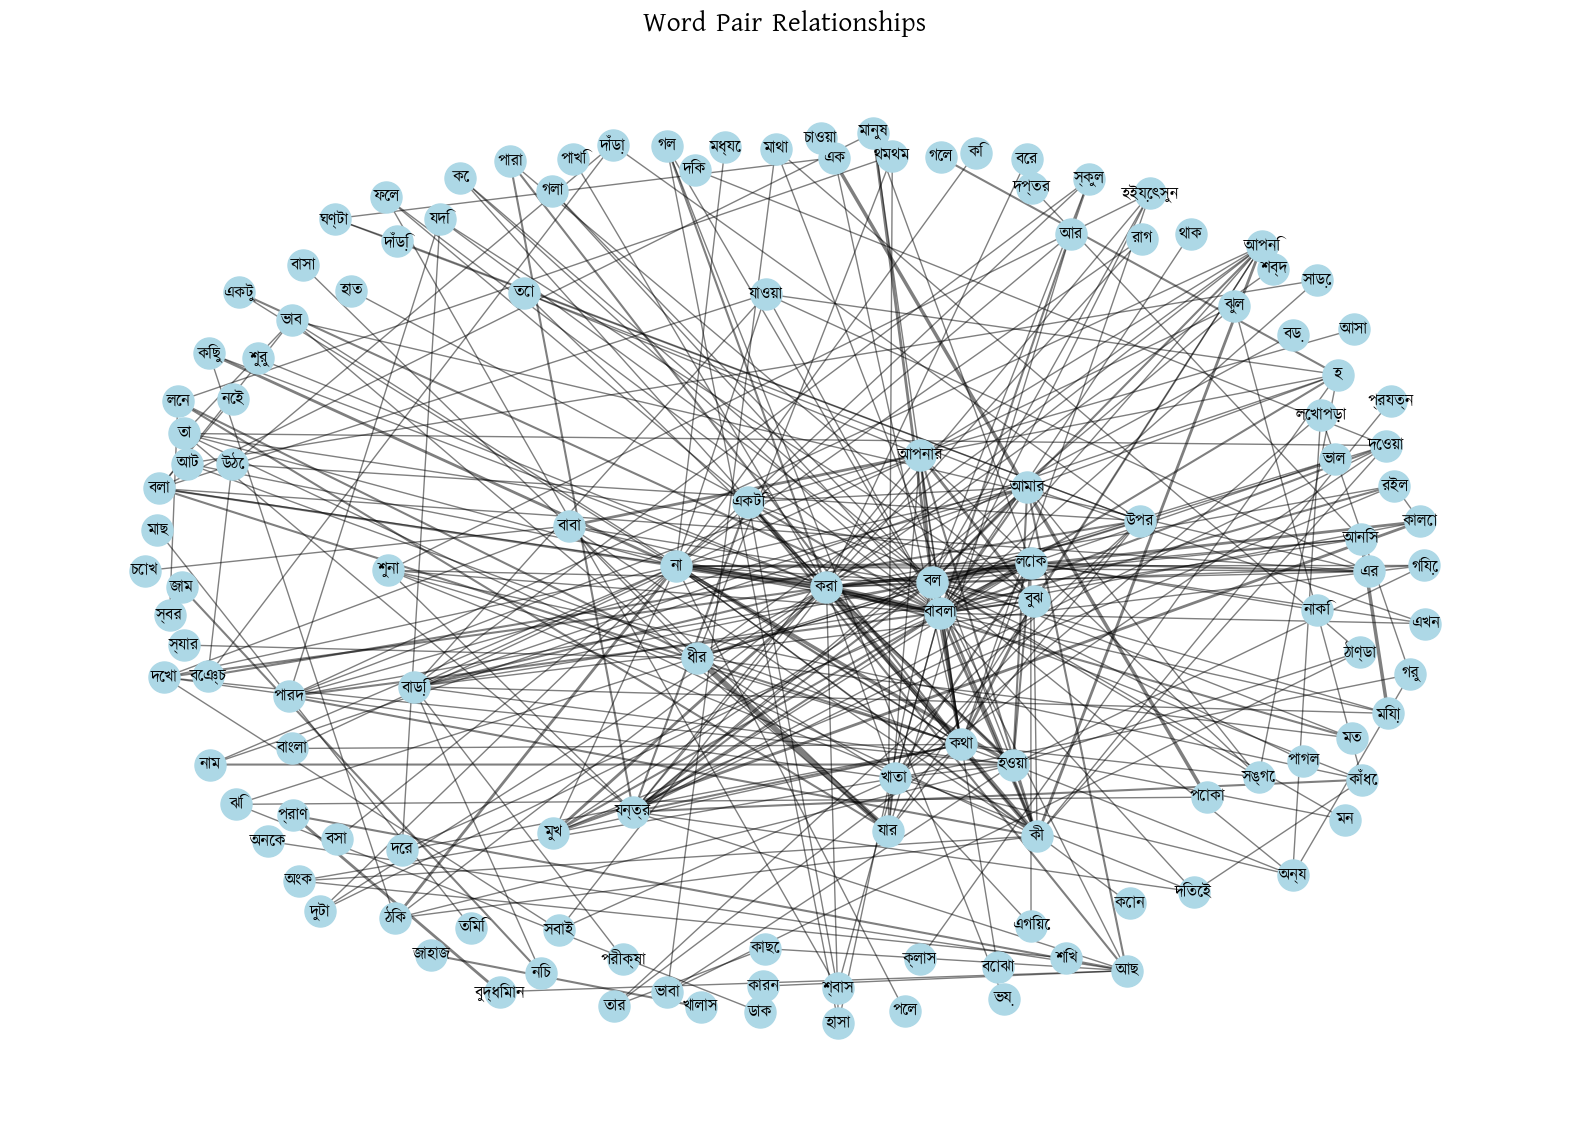

In [380]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs that appear in the same sentence and have frequency > 1
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)

    # Iterate through sentences to collect word pairs
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Only consider unique words (no repetition in the same sentence)

        # Generate pairs for unique words in this sentence
        word_pairs = combinations(unique_words, 2)

        # Increment frequency for each word pair
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency

# Function to plot word pairs with Bangla labels, considering pair frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Only add edges for pairs with frequency > 1 (appeared in multiple sentences)
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Get the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Layout and visualization of the graph
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw the network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')  # Turn off axis
    plt.show()

# Function to create word pairs from cleaned sentences (for testing and visualization)
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'



# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create word pairs for each sentence (for visualization/testing)
create_word_pairs(cleaned_sentences)

# Plot word pairs with Bangla labels (for pairs with frequency > 1)
plot_word_pairs(pair_frequency, font_path)


In [381]:
!pip install gensim matplotlib scikit-learn


# WORD 2 VEC EMBEDDING OF THE WORDS (Words that have edges)

In [382]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Print the Word2Vec representation for each word in the graph
for word, vector in word2vec_embeddings.items():
    print(f"Word: {word}")
    print(f"Word2Vec representation: {vector[:5]}...")  # Print first 5 values of the vector for brevity


Total number of nodes: 130
Word: খাতা
Word2Vec representation: [-0.00728725 -0.00203657 -0.00787482  0.00768478  0.00634596]...
Word: অংক
Word2Vec representation: [ 0.00968717  0.00276389  0.00526863 -0.00548612  0.00459176]...
Word: আট
Word2Vec representation: [-0.00052318  0.00369661 -0.00657164  0.00756268 -0.00480071]...
Word: বাবলা
Word2Vec representation: [-0.00068438  0.00383661 -0.00659762 -0.00104089  0.00818481]...
Word: সাড়ে
Word2Vec representation: [-4.6437560e-03  6.5209524e-06  4.4862144e-03 -9.9512273e-03
  3.8896336e-03]...
Word: যার
Word2Vec representation: [-0.00049582  0.00450009  0.00217629  0.01021275  0.00076881]...
Word: দেওয়া
Word2Vec representation: [-0.00978427  0.00980586 -0.0076187  -0.002507   -0.00475137]...
Word: ধীর
Word2Vec representation: [ 0.00108313  0.00686364  0.01011068  0.00921872 -0.00787908]...
Word: উপর
Word2Vec representation: [ 0.00943373  0.00752863  0.00135689 -0.00330508 -0.00038647]...
Word: বড়
Word2Vec representation: [ 0.00666631  0.

Total number of nodes: 130


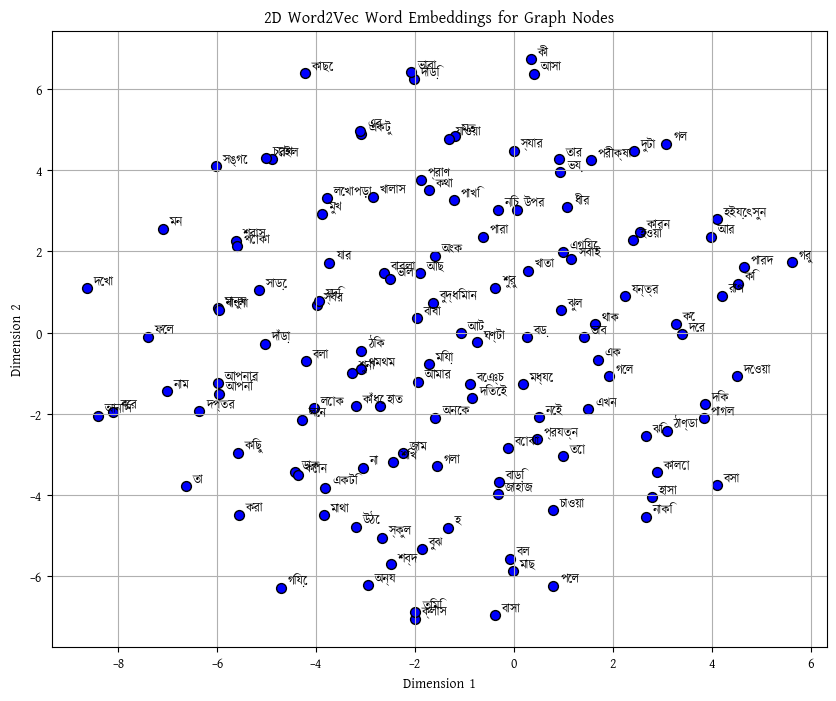

In [383]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to plot the Word2Vec embeddings in 2D using t-SNE
def plot_word_embeddings_2d(word_embeddings):
    # Reduce the dimensionality to 2D using t-SNE
    words = list(word_embeddings.keys())
    vectors = np.array(list(word_embeddings.values()))

    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    # Plot the words in the 2D space
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', c='blue', edgecolor='k', s=50)

    # Annotate each word at its position
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=9)

    # Display the plot
    plt.title('2D Word2Vec Word Embeddings for Graph Nodes')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot the Word2Vec embeddings for the graph nodes in 2D
plot_word_embeddings_2d(word2vec_embeddings)


# COSINE SIMILARITY

The cosine similarity between two vectors
𝐴
A and
𝐵
B is given by:

cosine similarity
(
𝐴
,
𝐵
)
=
𝐴
⋅
𝐵
∥
𝐴
∥
∥
𝐵
∥
cosine similarity(A,B)=
∥A∥∥B∥
A⋅B
​


In [384]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to calculate and print cosine similarities between words connected by edges
def print_cosine_similarities(graph, word_embeddings):
    total_similarities = 0
    similarities = []

    # Iterate over the edges of the graph
    for node1, node2 in graph.edges():
        if node1 in word_embeddings and node2 in word_embeddings:
            # Get the embeddings for the two nodes
            vec1 = word_embeddings[node1].reshape(1, -1)
            vec2 = word_embeddings[node2].reshape(1, -1)

            # Compute cosine similarity
            similarity = cosine_similarity(vec1, vec2)[0][0]
            similarities.append((node1, node2, similarity))

            total_similarities += 1

    # Print the cosine similarities for each pair
    for node1, node2, similarity in similarities:
        print(f"Cosine similarity between '{node1}' and '{node2}': {similarity:.4f}")

    # Print the total number of cosine similarities
    print(f"Total number of cosine similarities: {total_similarities}")


# Path to the Kalpurush font
font_path = 'kalpurush.ttf'



# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Print cosine similarities for the words connected by edges
print_cosine_similarities(graph, word2vec_embeddings)


Total number of nodes: 130
Cosine similarity between 'খাতা' and 'অংক': 0.0717
Cosine similarity between 'খাতা' and 'যার': -0.1101
Cosine similarity between 'খাতা' and 'দেওয়া': 0.0068
Cosine similarity between 'খাতা' and 'ধীর': 0.0890
Cosine similarity between 'খাতা' and 'উপর': 0.1280
Cosine similarity between 'খাতা' and 'বাবলা': 0.0915
Cosine similarity between 'খাতা' and 'সবাই': 0.0332
Cosine similarity between 'খাতা' and 'দেখা': -0.0579
Cosine similarity between 'খাতা' and 'করা': 0.0344
Cosine similarity between 'খাতা' and 'লোক': -0.0097
Cosine similarity between 'খাতা' and 'এগিয়ে': 0.2843
Cosine similarity between 'খাতা' and 'অন্য': -0.0029
Cosine similarity between 'খাতা' and 'হওয়া': 0.2131
Cosine similarity between 'খাতা' and 'লেখাপড়া': -0.0390
Cosine similarity between 'খাতা' and 'গরু': 0.0252
Cosine similarity between 'অংক' and 'কী': -0.0377
Cosine similarity between 'অংক' and 'শিখ': 0.1030
Cosine similarity between 'আট' and 'বাবলা': 0.1466
Cosine similarity between 'আট' and 'সা

# COSINE SIMILARITY >0.1

In [385]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to calculate and print cosine similarities between words connected by edges
def print_cosine_similarities(graph, word_embeddings, similarity_threshold=0.1):
    total_similarities = 0
    similarities = []

    # Iterate over the edges of the graph
    for node1, node2 in graph.edges():
        if node1 in word_embeddings and node2 in word_embeddings:
            # Get the embeddings for the two nodes
            vec1 = word_embeddings[node1].reshape(1, -1)
            vec2 = word_embeddings[node2].reshape(1, -1)

            # Compute cosine similarity
            similarity = cosine_similarity(vec1, vec2)[0][0]

            # Filter out similarities less than the threshold
            if similarity > similarity_threshold:
                similarities.append((node1, node2, similarity))
                total_similarities += 1

    # Print the cosine similarities for each pair
    for node1, node2, similarity in similarities:
        print(f"Cosine similarity between '{node1}' and '{node2}': {similarity:.4f}")

    # Print the total number of cosine similarities
    print(f"Total number of cosine similarities greater than {similarity_threshold}: {total_similarities}")


# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Print cosine similarities greater than 0.1 for the words connected by edges
print_cosine_similarities(graph, word2vec_embeddings, similarity_threshold=0.1)


Total number of nodes: 130
Cosine similarity between 'খাতা' and 'উপর': 0.1280
Cosine similarity between 'খাতা' and 'এগিয়ে': 0.2843
Cosine similarity between 'খাতা' and 'হওয়া': 0.2131
Cosine similarity between 'অংক' and 'শিখ': 0.1030
Cosine similarity between 'আট' and 'বাবলা': 0.1466
Cosine similarity between 'বাবলা' and 'গলা': 0.1428
Cosine similarity between 'বাবলা' and 'রইল': 0.1899
Cosine similarity between 'বাবলা' and 'কী': 0.1108
Cosine similarity between 'বাবলা' and 'বাবা': 0.1811
Cosine similarity between 'বাবলা' and 'শ্বাস': 0.1289
Cosine similarity between 'বাবলা' and 'স্কুল': 0.1462
Cosine similarity between 'বাবলা' and 'মুখ': 0.1083
Cosine similarity between 'বাবলা' and 'হ': 0.2272
Cosine similarity between 'বাবলা' and 'কথা': 0.1889
Cosine similarity between 'দেওয়া' and 'দিক': 0.2318
Cosine similarity between 'দেওয়া' and 'যন্ত্র': 0.1577
Cosine similarity between 'দেওয়া' and 'তা': 0.1552
Cosine similarity between 'ধীর' and 'উপর': 0.2164
Cosine similarity between 'উপর' and 'দ

Total number of nodes: 130


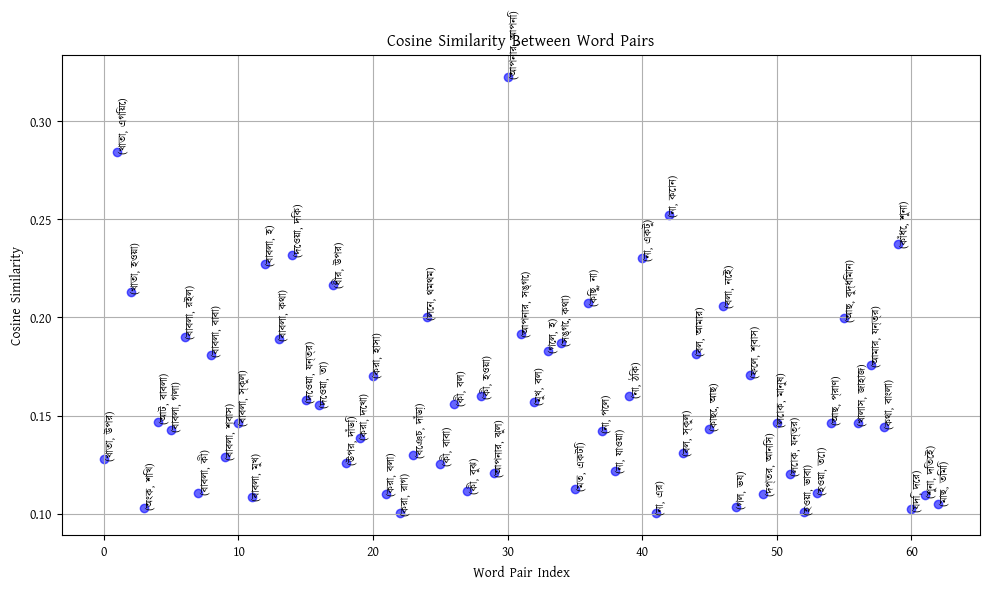

In [386]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to calculate and store cosine similarities between words connected by edges
def get_cosine_similarities(graph, word_embeddings, similarity_threshold=0.1):
    similarities = []

    # Iterate over the edges of the graph
    for node1, node2 in graph.edges():
        if node1 in word_embeddings and node2 in word_embeddings:
            # Get the embeddings for the two nodes
            vec1 = word_embeddings[node1].reshape(1, -1)
            vec2 = word_embeddings[node2].reshape(1, -1)

            # Compute cosine similarity
            similarity = cosine_similarity(vec1, vec2)[0][0]

            # Filter out similarities less than the threshold
            if similarity > similarity_threshold:
                similarities.append((node1, node2, similarity))

    return similarities

# Function to plot the cosine similarities
def plot_cosine_similarities(similarities):
    # Extract the word pairs and their corresponding cosine similarities
    words1 = [pair[0] for pair in similarities]
    words2 = [pair[1] for pair in similarities]
    cosine_vals = [pair[2] for pair in similarities]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(cosine_vals)), cosine_vals, color='blue', alpha=0.6)

    # Annotate each point with the word pairs
    for i, (w1, w2) in enumerate(zip(words1, words2)):
        plt.text(i, cosine_vals[i], f"({w1}, {w2})", fontsize=8, rotation=90)

    # Set the labels and title
    plt.xlabel('Word Pair Index')
    plt.ylabel('Cosine Similarity')
    plt.title('Cosine Similarity Between Word Pairs')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Get the cosine similarities between the words with edges
similarities = get_cosine_similarities(graph, word2vec_embeddings, similarity_threshold=0.1)

# Plot the cosine similarities
plot_cosine_similarities(similarities)


Total number of nodes: 74


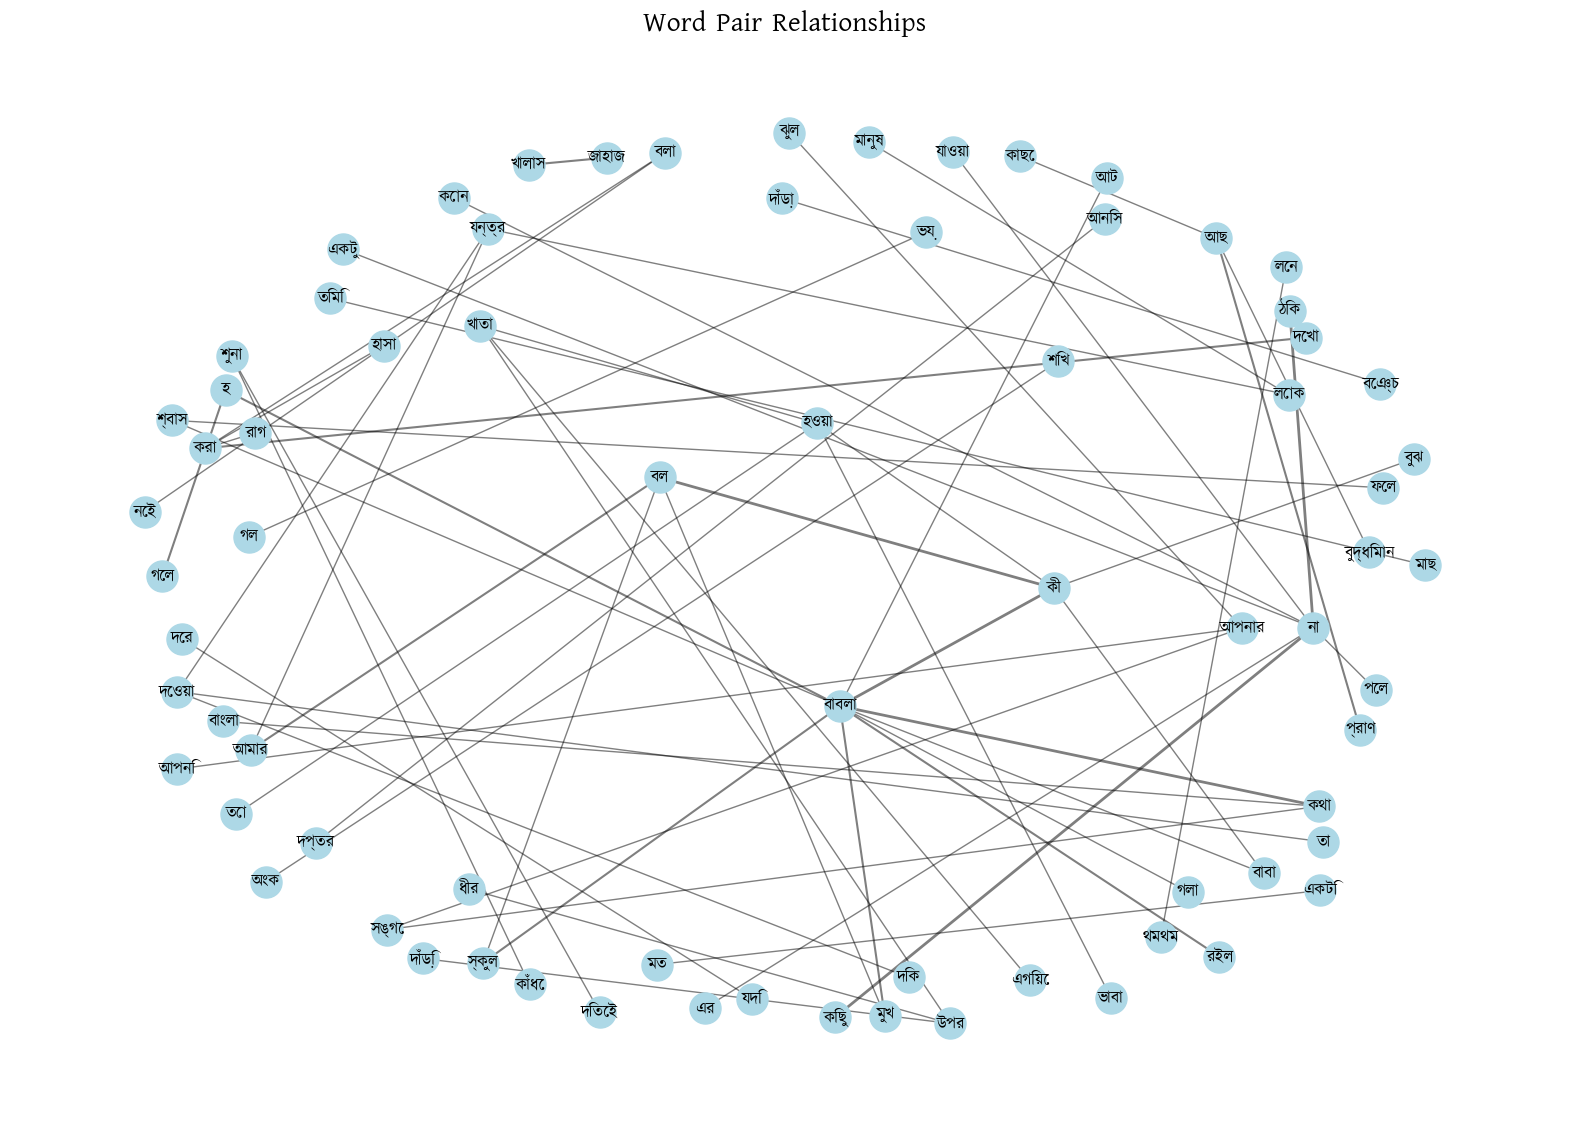

In [387]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# DEGREE
### In graph theory, the degree (or valency) of a vertex of a graph is the number of edges that are incident to the vertex; in a multigraph, a loop contributes 2 to a vertex's degree, for the two ends of the edge.[1] The degree of a vertex
v
{\displaystyle v} is denoted
deg
⁡
(
v
)
{\displaystyle \deg(v)} or
deg
⁡
v
{\displaystyle \deg v}. The maximum degree of a graph
G
{\displaystyle G} is denoted by
Δ
(
G
)
{\displaystyle \Delta (G)}, and is the maximum of
G
{\displaystyle G}'s vertices' degrees. The minimum degree of a graph is denoted by
δ
(
G
)
{\displaystyle \delta (G)}, and is the minimum of
G
{\displaystyle G}'s vertices' degrees. In the multigraph shown on the right, the maximum degree is 5 and the minimum degree is 0.

### MAX DEGREE

Total number of nodes: 74
The node with the highest degree is: বাবলা with degree 10


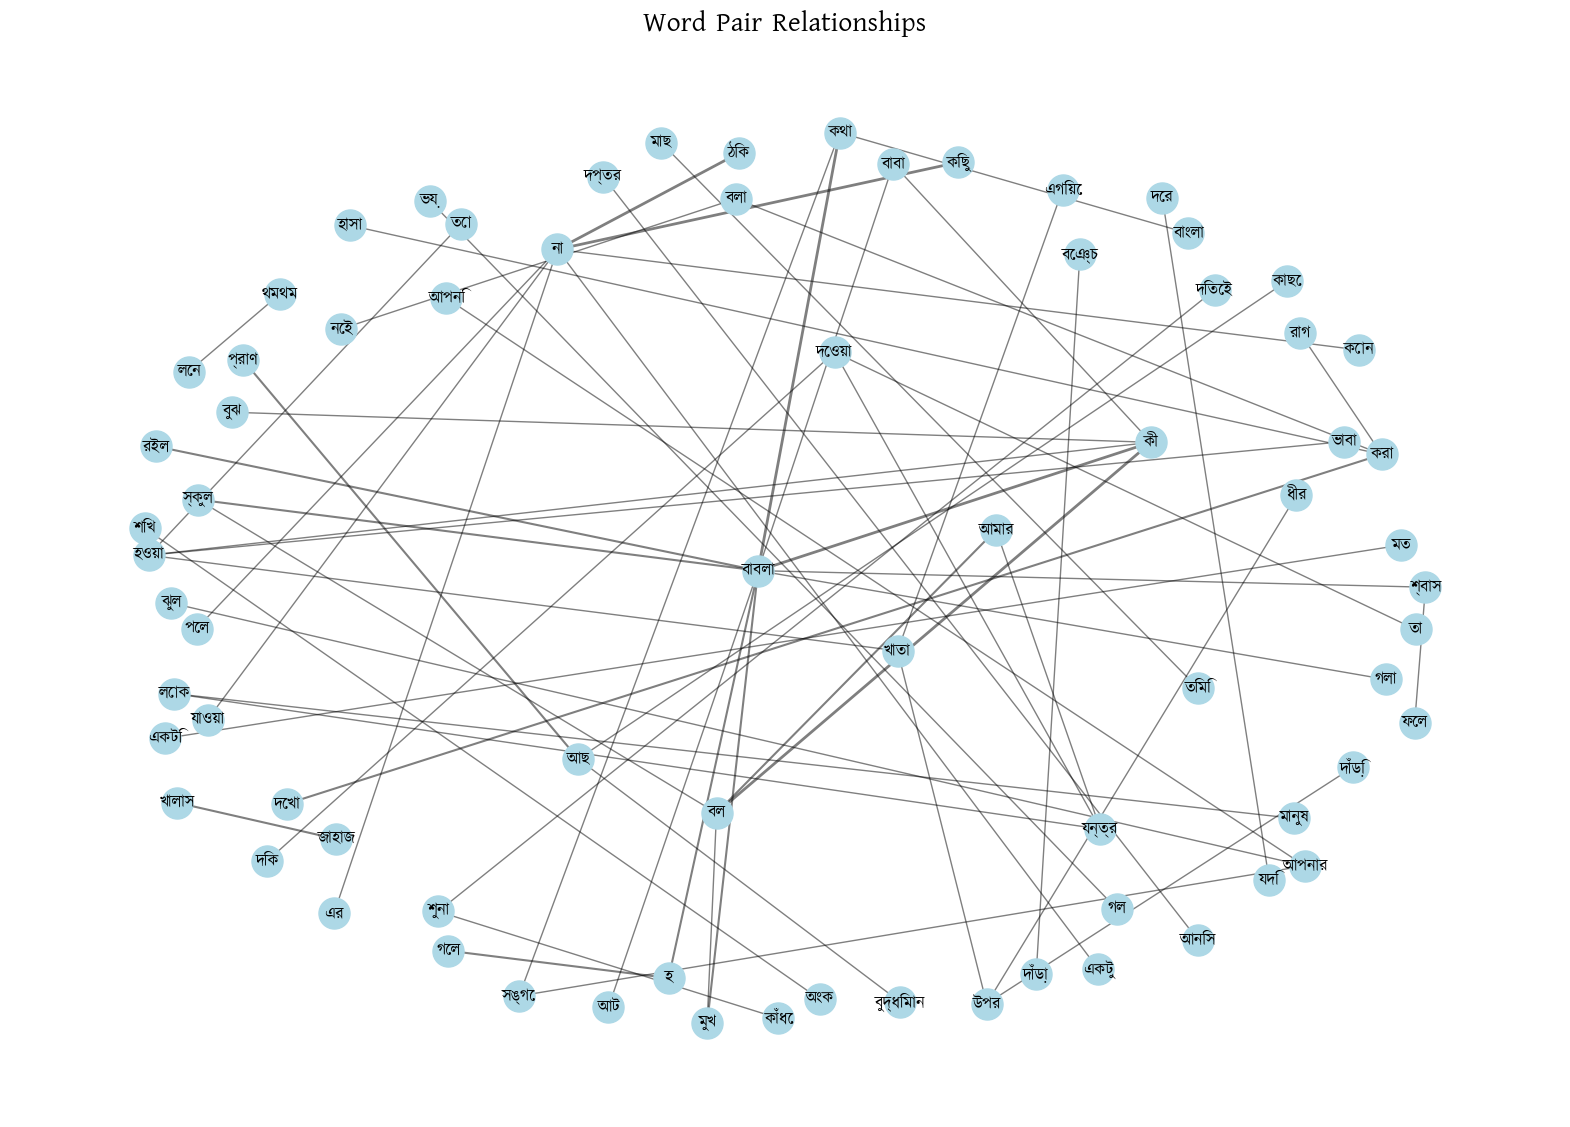

In [388]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Find and print the node with the highest degree
    highest_degree_node = max(G.degree(), key=lambda x: x[1])  # Find the node with the highest degree
    print(f"The node with the highest degree is: {highest_degree_node[0]} with degree {highest_degree_node[1]}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


Total number of nodes: 74
The node with the highest degree is: বাবলা with degree 10


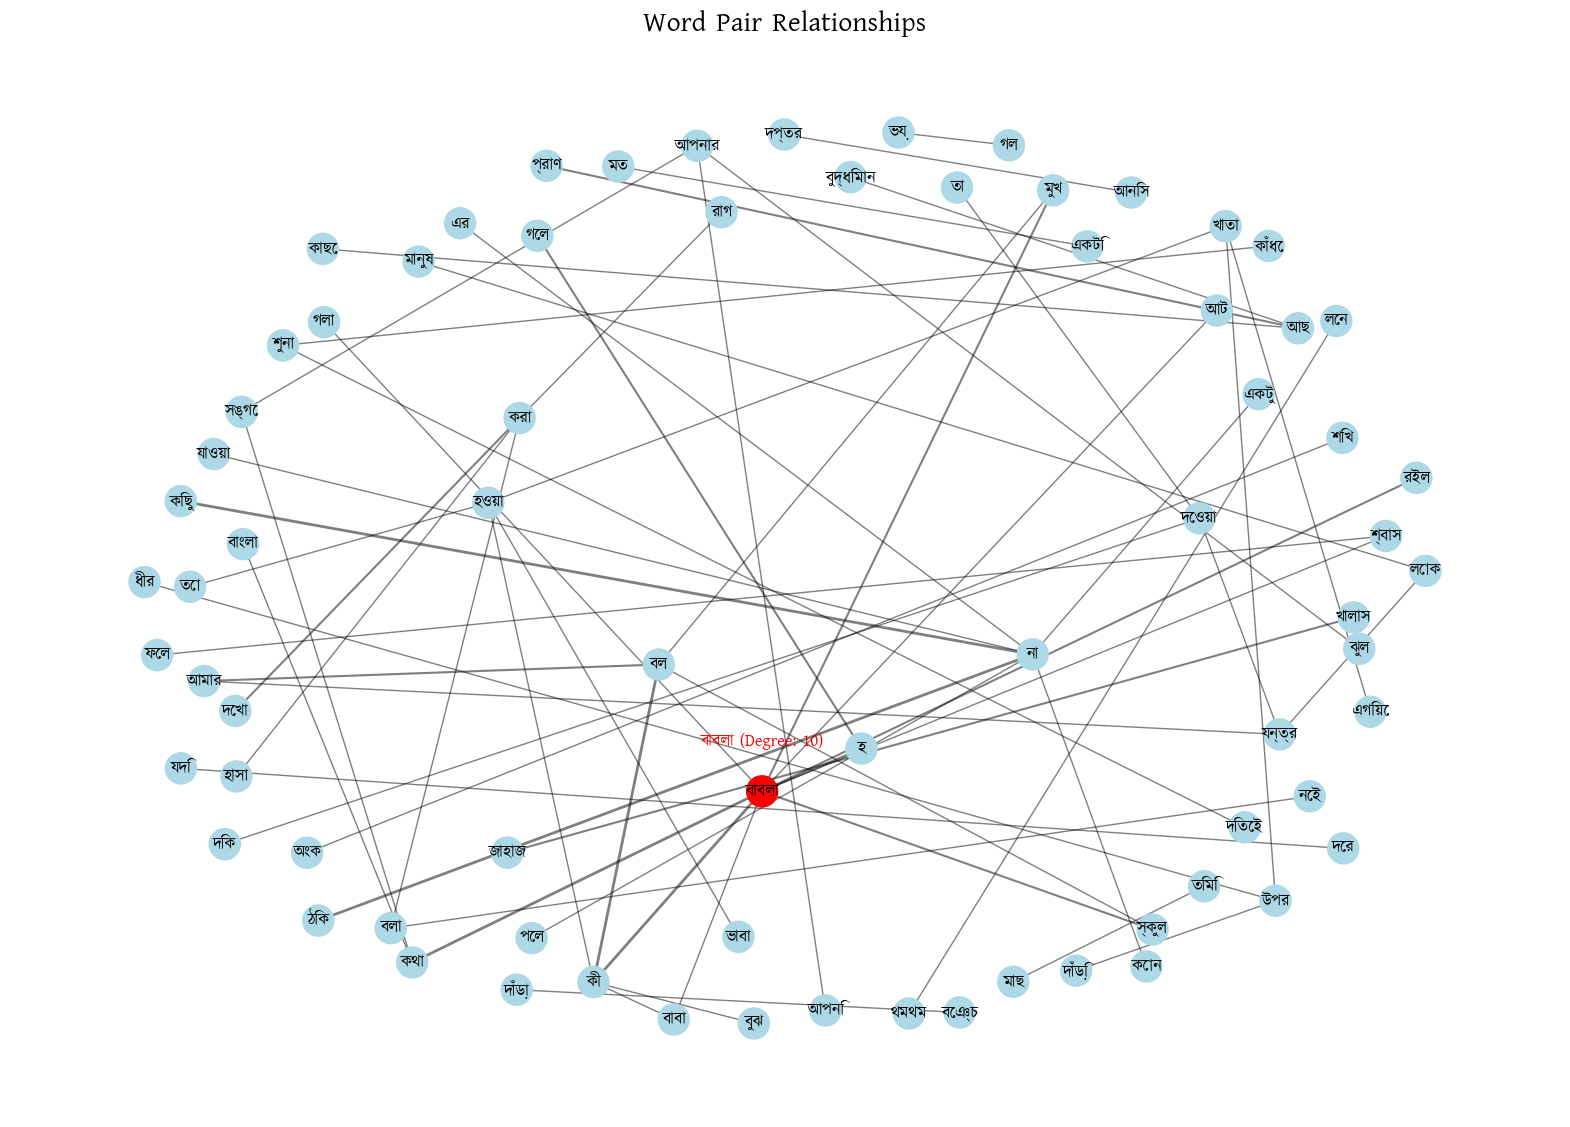

In [389]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Find the node with the highest degree
    highest_degree_node = max(G.degree(), key=lambda x: x[1])

    # Print the total number of nodes and the node with the highest degree
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes
    print(f"The node with the highest degree is: {highest_degree_node[0]} with degree {highest_degree_node[1]}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    node_colors = ['red' if node == highest_degree_node[0] else 'lightblue' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Annotate the highest degree node
    plt.text(
        pos[highest_degree_node[0]][0],
        pos[highest_degree_node[0]][1] + 0.1,
        f"{highest_degree_node[0]} (Degree: {highest_degree_node[1]})",
        fontsize=12, color='red', ha='center'
    )

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Example usage
# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


### MIN DEGREE ( MINIMUM DEGEEE NODE THAT IS NOT 0)

The node with the lowest degree that is not zero is: আট with degree 1


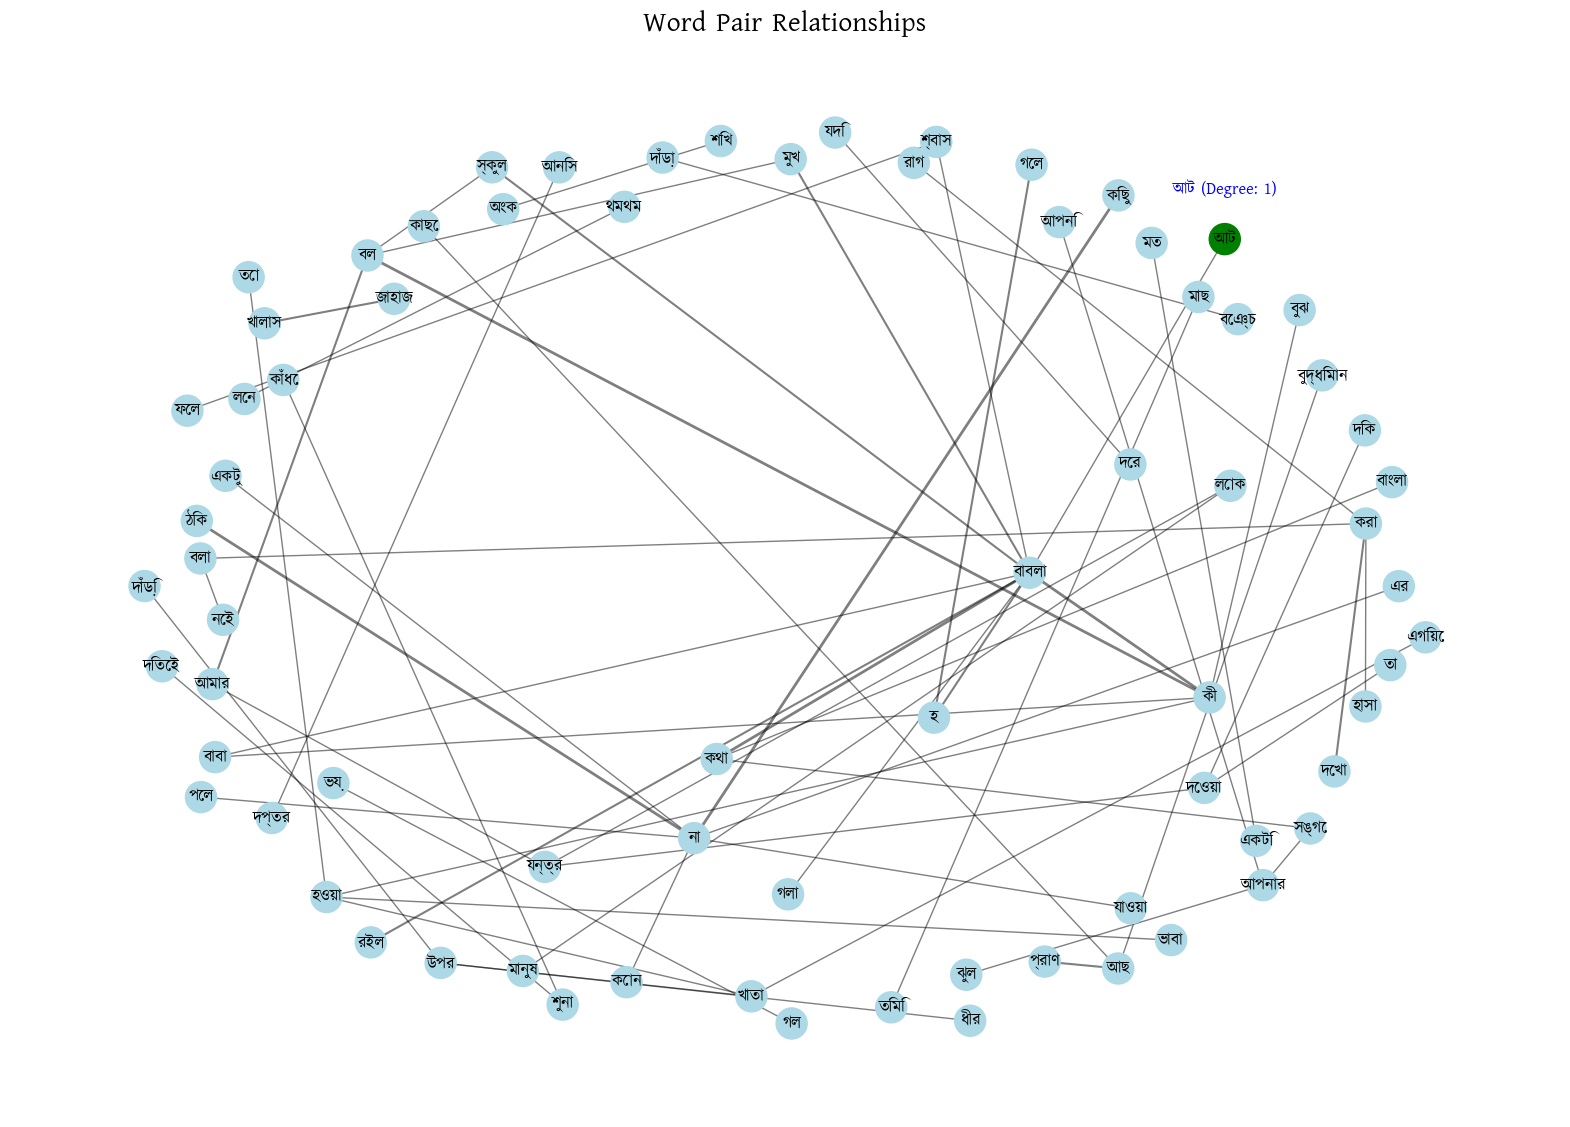

In [390]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Find the node with the lowest degree that is not zero
    lowest_degree_node = find_lowest_degree_nonzero(G)
    if lowest_degree_node:
        print(f"The node with the lowest degree that is not zero is: {lowest_degree_node[0]} with degree {lowest_degree_node[1]}")
    else:
        print("No nodes with non-zero degree.")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color and highlight the lowest degree node
    node_colors = ['lightblue' if node != lowest_degree_node[0] else 'green' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Annotate the lowest degree node
    if lowest_degree_node:
        plt.text(
            pos[lowest_degree_node[0]][0],
            pos[lowest_degree_node[0]][1] + 0.1,
            f"{lowest_degree_node[0]} (Degree: {lowest_degree_node[1]})",
            fontsize=12, color='blue', ha='center'
        )

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to find the node with the lowest degree that is not zero
def find_lowest_degree_nonzero(G):
    # Initialize variables to track the node with the lowest non-zero degree
    lowest_degree_node = None
    lowest_degree = float('inf')

    # Iterate through all nodes and check their degree
    for node, degree in G.degree():
        if degree > 0 and degree < lowest_degree:  # Ignore nodes with degree 0
            lowest_degree = degree
            lowest_degree_node = (node, degree)

    return lowest_degree_node

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Example usage
# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# CHROMATIC NUMBER

Total number of nodes: 74
Chromatic number: 3


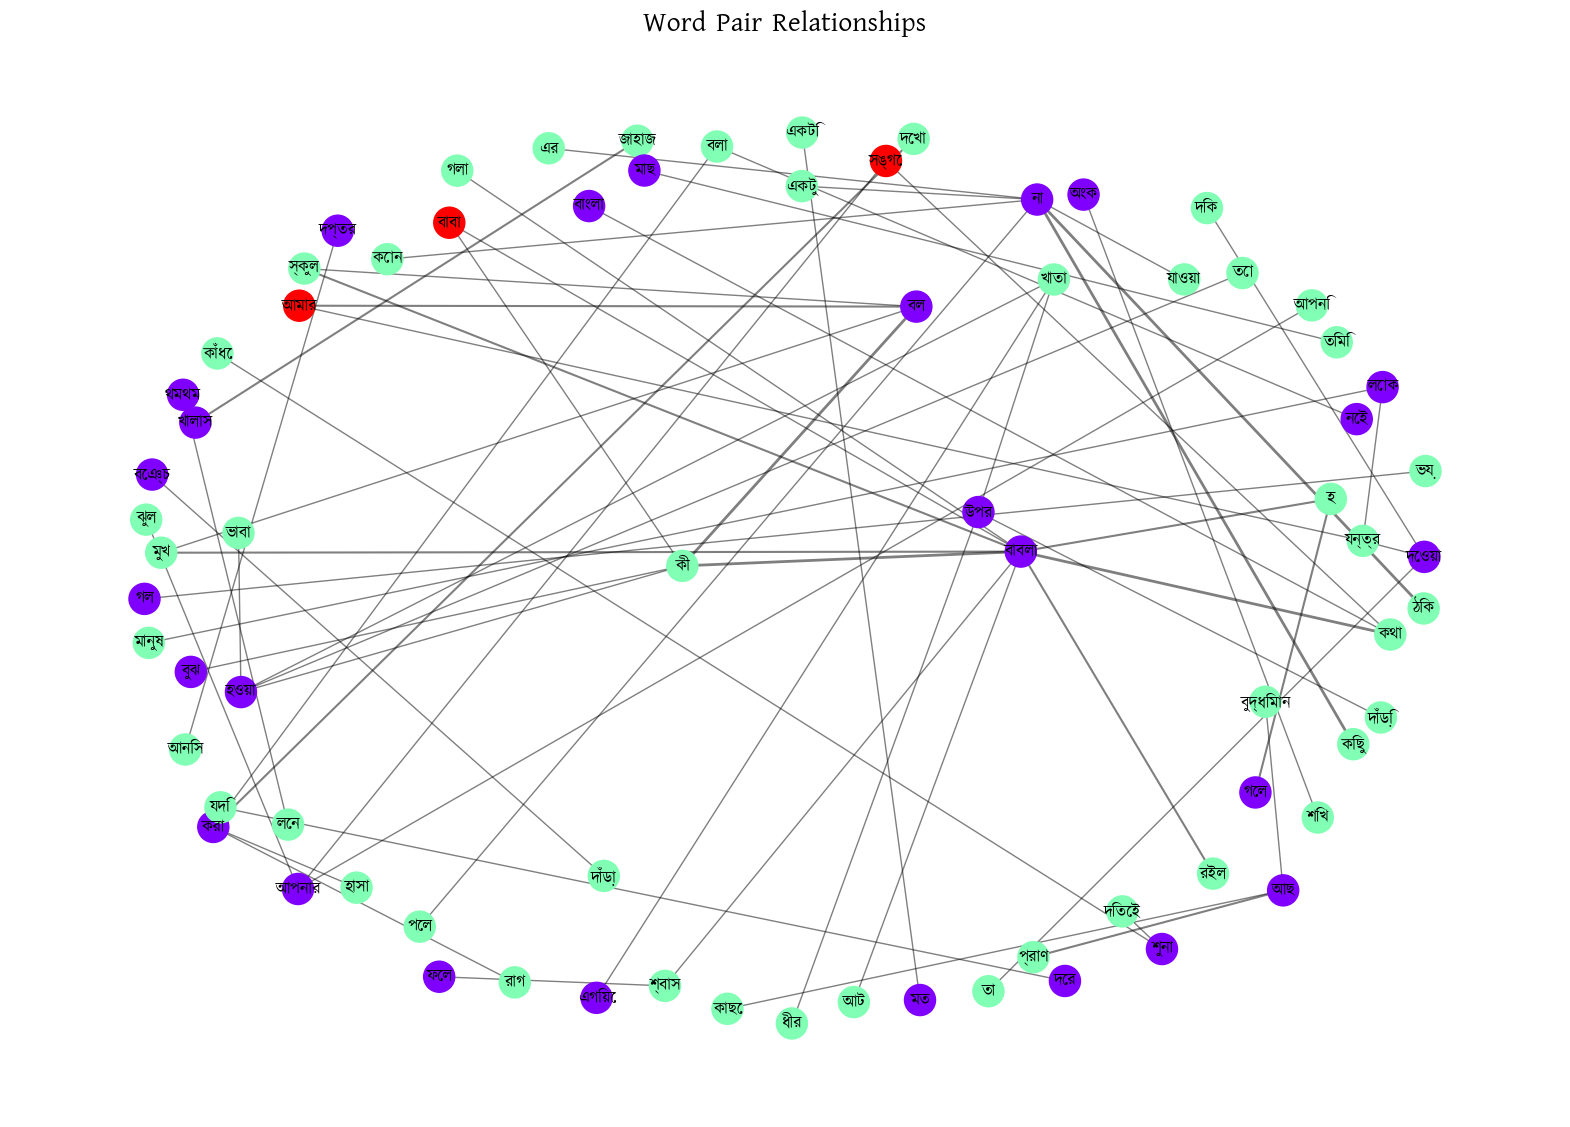

In [391]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # # Find and print the node with the highest degree
    # highest_degree_node = max(G.degree(), key=lambda x: x[1])  # Find the node with the highest degree
    # print(f"The node with the highest degree is: {highest_degree_node[0]} with degree {highest_degree_node[1]}")

    # Calculate the chromatic number using greedy coloring
    color_map = nx.coloring.greedy_color(G, strategy='largest_first')
    chromatic_number = max(color_map.values()) + 1  # Chromatic number is the max color index + 1
    print(f"Chromatic number: {chromatic_number}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Draw the graph
    plt.figure(figsize=(20, 14))

    # Draw network nodes with colors based on their assigned color
    node_colors = [color_map[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.rainbow)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw labels with Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# CHROMATIC INDEX

In [392]:
!pip install --upgrade networkx

Total number of nodes: 74
Chromatic number: 3
Chromatic index: 63


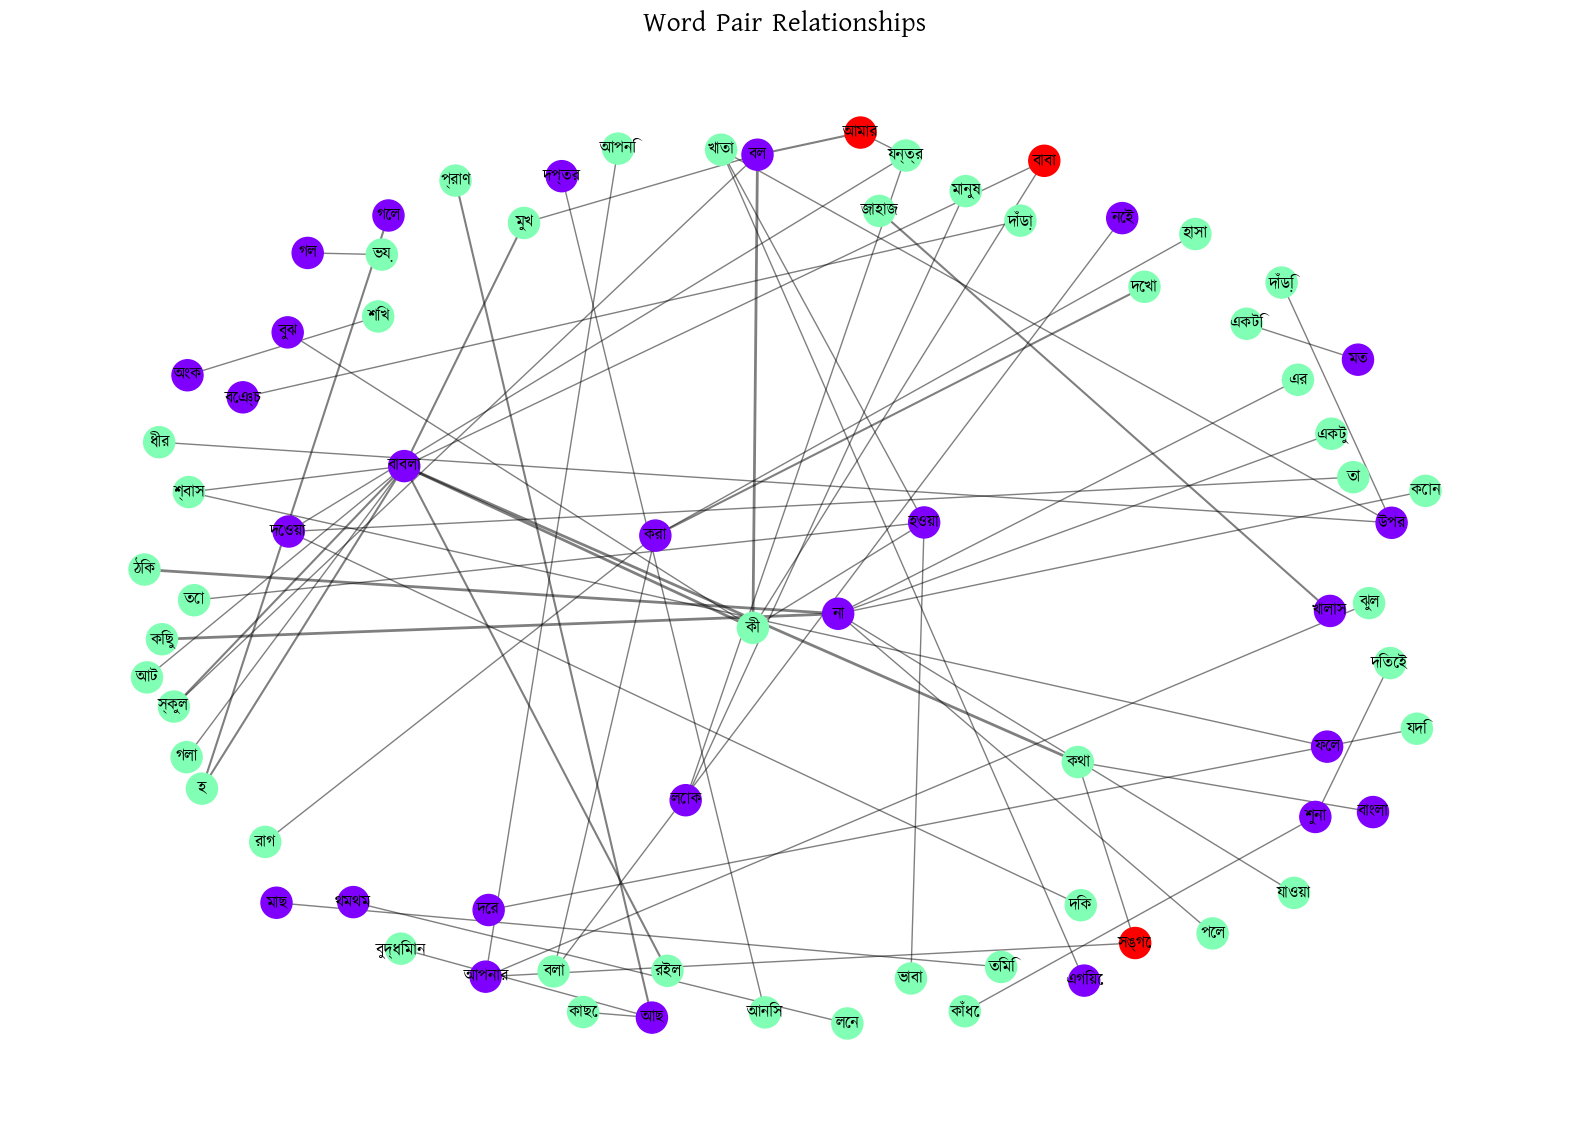

In [393]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Calculate the chromatic number using greedy coloring (node coloring)
    color_map = nx.coloring.greedy_color(G, strategy='largest_first')
    chromatic_number = max(color_map.values()) + 1  # Chromatic number is the max color index + 1
    print(f"Chromatic number: {chromatic_number}")

    # Greedy Edge Coloring (Fallback)
    edge_colors = greedy_edge_coloring(G)
    chromatic_index = len(set(edge_colors.values()))  # The chromatic index is the number of colors used
    # print(f"Chromatic index (greedy): {chromatic_index}")
    print(f"Chromatic index: {chromatic_index}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Draw the graph
    plt.figure(figsize=(20, 14))

    # Draw network nodes with colors based on their assigned color
    node_colors = [color_map[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.rainbow)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw labels with Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')
    plt.show()

# Greedy algorithm for edge coloring
def greedy_edge_coloring(G):
    """
    Assigns colors to edges using a greedy algorithm.
    Returns a dictionary of edge: color assignments.
    """
    edge_colors = {}
    color = 0

    # Sort edges by the largest degree node
    edges = sorted(G.edges(), key=lambda e: max(G.degree(e[0]), G.degree(e[1])), reverse=True)

    for edge in edges:
        neighbor_colors = set()
        for neighbor in G[edge[0]]:
            if (edge[0], neighbor) in edge_colors:
                neighbor_colors.add(edge_colors[(edge[0], neighbor)])
        for neighbor in G[edge[1]]:
            if (edge[1], neighbor) in edge_colors:
                neighbor_colors.add(edge_colors[(edge[1], neighbor)])

        # Find the first available color that is not used by neighbors
        while color in neighbor_colors:
            color += 1
        edge_colors[edge] = color
        color += 1  # Increment color for next edge

    return edge_colors

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# DEGENARACY

### In graph theory, a k-degenerate graph is an undirected graph in which every subgraph has at least one vertex of degree at most k: that is, some vertex in the subgraph touches k or fewer of the subgraph's edges. The degeneracy of a graph is the smallest value of k for which it is k-degenerate. The degeneracy of a graph is a measure of how sparse it is, and is within a constant factor of other sparsity measures such as the arboricity of a graph.

Total number of nodes: 74
Graph Degeneracy: 2


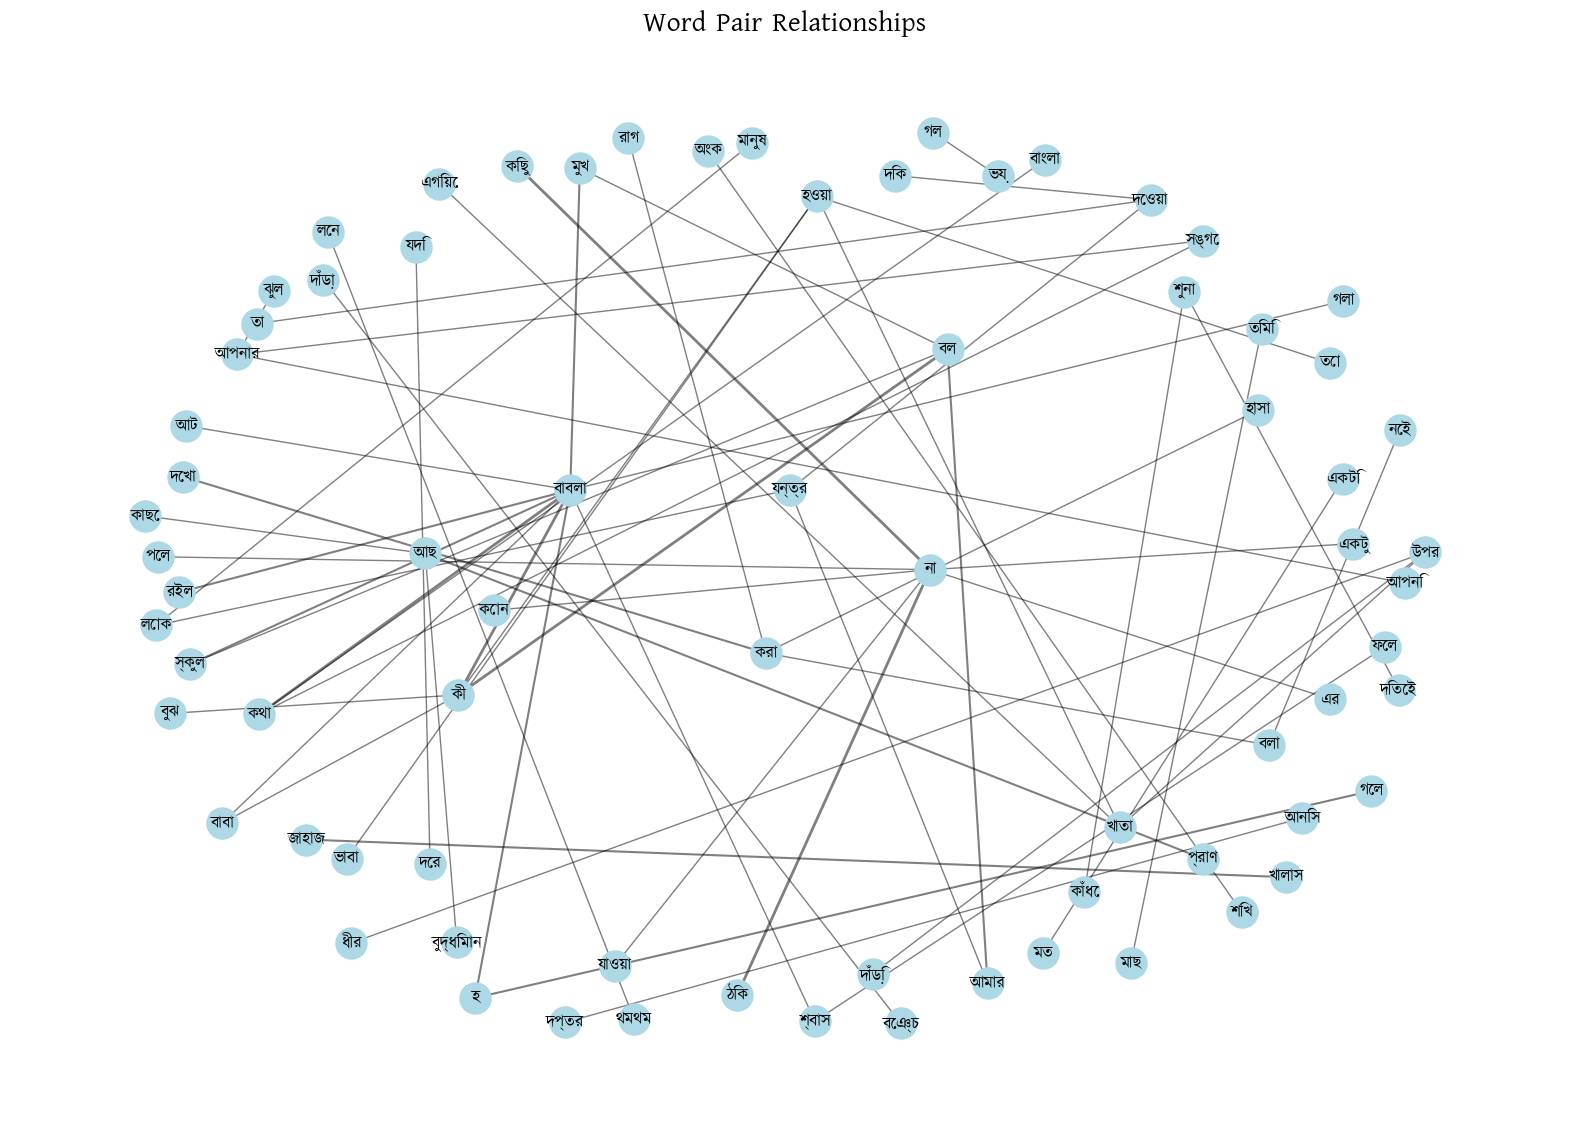

In [394]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to calculate degeneracy of the graph
def calculate_degeneracy(G):
    """
    Calculate the degeneracy of a graph.
    Degeneracy is the smallest k such that the graph has a k-degenerate ordering.
    """
    # Create a copy of the graph to avoid modifying the original
    graph = G.copy()

    # Track the maximum degree encountered during node removal
    degeneracy = 0
    core_numbers = {}

    # Iteratively remove nodes with minimum degree
    while graph.number_of_nodes() > 0:
        # Find the node with the minimum degree
        degree_dict = dict(graph.degree())
        if not degree_dict:
            break

        min_degree = min(degree_dict.values())
        min_degree_nodes = [n for n, d in degree_dict.items() if d == min_degree]

        # If multiple nodes have the same minimum degree, choose one
        min_degree_node = min_degree_nodes[0]

        # Update degeneracy with the current node's degree
        core_numbers[min_degree_node] = min_degree
        degeneracy = max(degeneracy, graph.degree(min_degree_node))

        # Remove the node with minimum degree
        graph.remove_node(min_degree_node)

    return degeneracy

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Calculate and print graph degeneracy
    degeneracy = calculate_degeneracy(G)
    print(f"Graph Degeneracy: {degeneracy}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# DENSITY

### To calculate the density of a graph, you can use the formula:

Density
=
2
×
Number of edges
Number of nodes
×
(
Number of nodes
−
1
)
Density=
Number of nodes×(Number of nodes−1)
2×Number of edges
​


Total number of nodes: 74
Graph Density: 0.0233


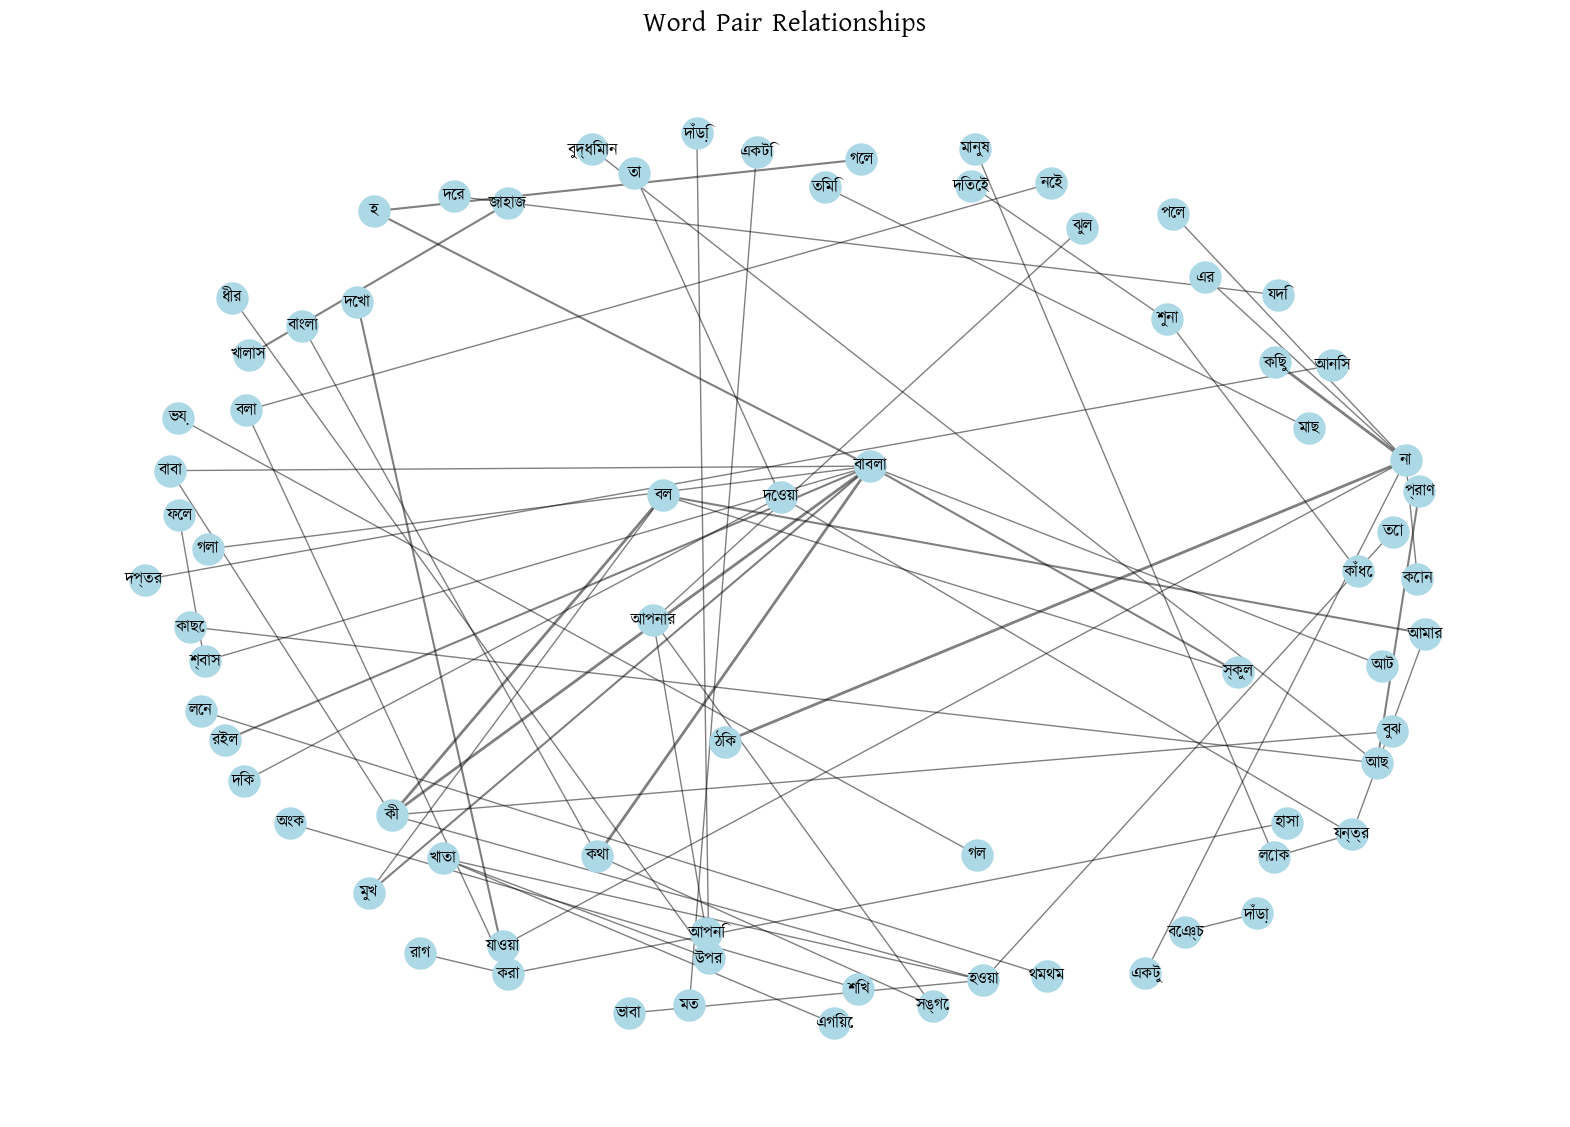

In [395]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to calculate graph density
def calculate_graph_density(G):
    """
    Calculate the density of a graph.
    The density is defined as the ratio of the number of edges to the number of possible edges.
    """
    # Get the number of nodes and edges in the graph
    num_nodes = len(G.nodes)
    num_edges = G.number_of_edges()

    # Calculate the maximum possible edges in an undirected graph
    max_possible_edges = num_nodes * (num_nodes - 1) / 2

    # Calculate and return the density
    if max_possible_edges == 0:  # Avoid division by zero if the graph has no nodes
        return 0.0
    return num_edges / max_possible_edges

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Calculate and print the graph density
    graph_density = calculate_graph_density(G)
    print(f"Graph Density: {graph_density:.4f}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# EDGE CUT, VERTEX CUT, EDGE CONNECTIVITY, VERTEX CONNECTIVITY, MATCHING, PERFECT MSATCHING

Total number of nodes: 74


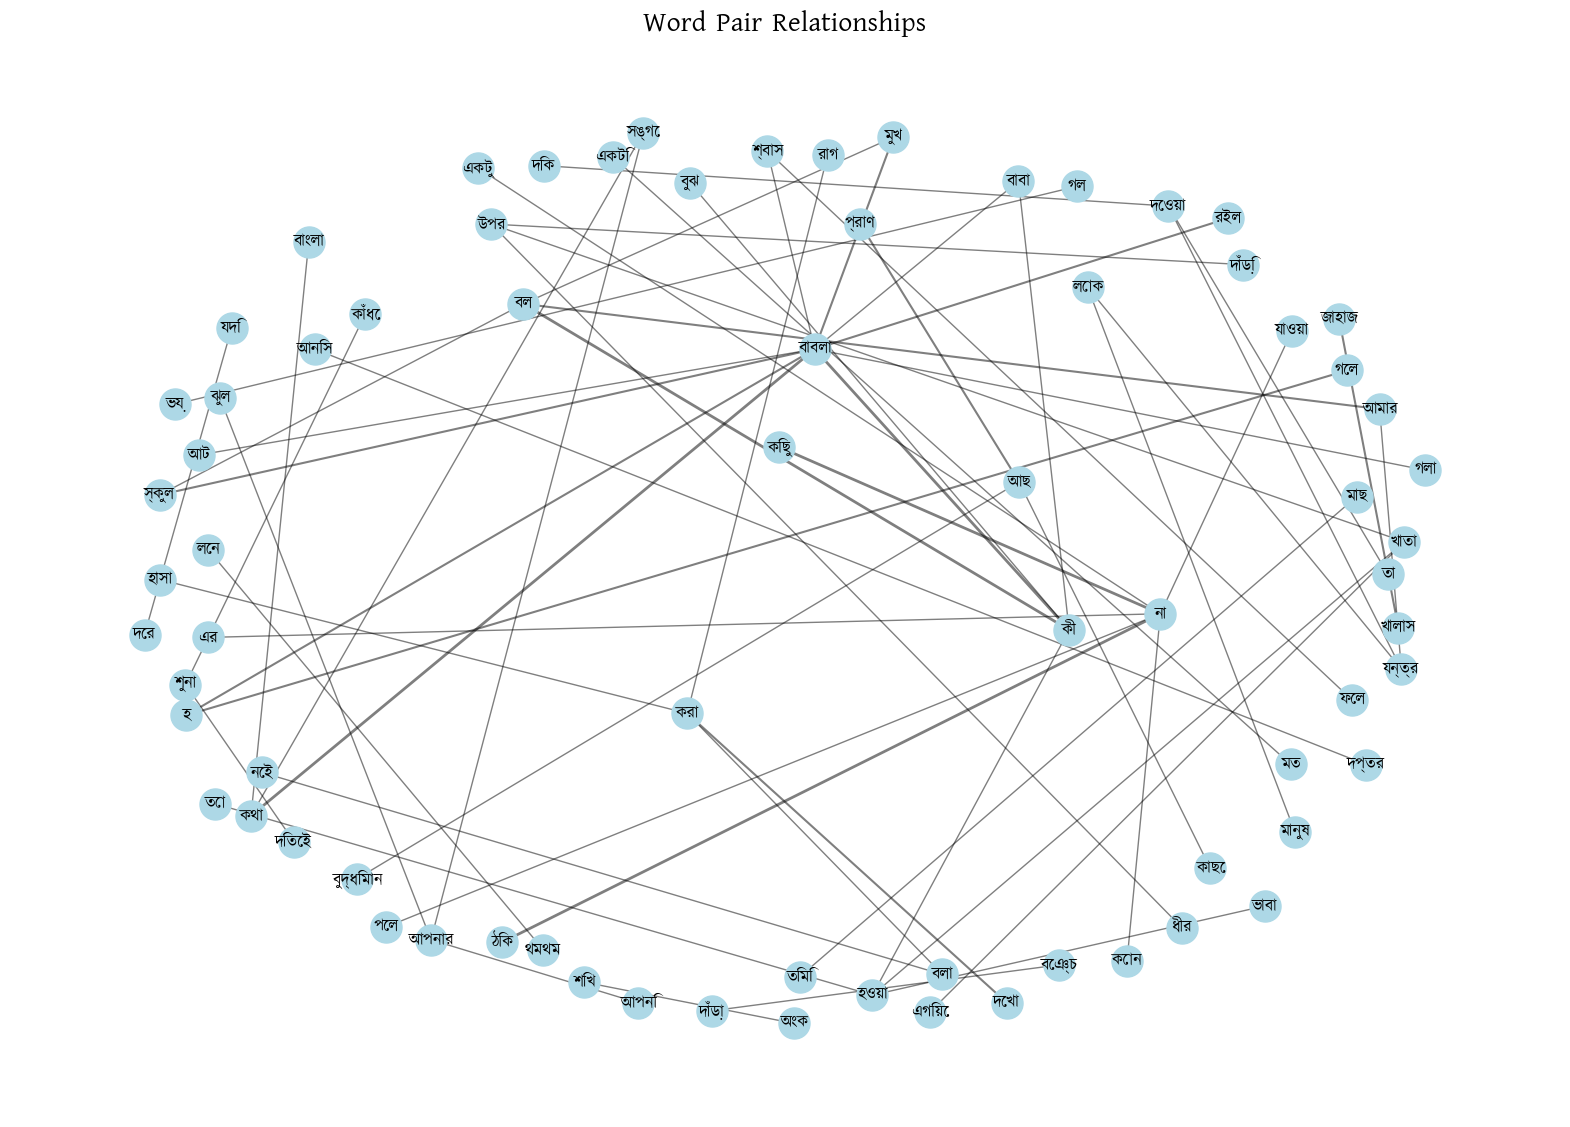

Edge Cut: [('আট', 'বাবলা'), ('বাবলা', 'গলা'), ('বাবলা', 'রইল'), ('বাবলা', 'কী'), ('বাবলা', 'বাবা'), ('বাবলা', 'শ্বাস'), ('বাবলা', 'স্কুল'), ('বাবলা', 'মুখ'), ('বাবলা', 'হ'), ('বাবলা', 'কথা'), ('খাতা', 'উপর'), ('খাতা', 'এগিয়ে'), ('খাতা', 'হওয়া'), ('উপর', 'ধীর'), ('উপর', 'দাঁড়ি'), ('বেঞ্চ', 'দাঁড়া'), ('দেখা', 'করা'), ('করা', 'হাসা'), ('করা', 'বলা'), ('করা', 'রাগ'), ('গেল', 'হ'), ('থমথম', 'লেন'), ('কিছু', 'না'), ('না', 'পেল'), ('না', 'যাওয়া'), ('না', 'ঠিক'), ('না', 'একটু'), ('না', 'এর'), ('না', 'কোন'), ('কী', 'বাবা'), ('কী', 'বল'), ('কী', 'বুঝ'), ('কী', 'হওয়া'), ('বল', 'স্কুল'), ('বল', 'আমার'), ('বল', 'মুখ'), ('মত', 'একটি'), ('অংক', 'শিখ'), ('ফেল', 'শ্বাস'), ('দপ্তর', 'আনিস'), ('গল', 'ভয়'), ('আছ', 'কাছে'), ('আছ', 'প্রাণ'), ('আছ', 'বুদ্ধিমান'), ('দিক', 'দেওয়া'), ('দেওয়া', 'যন্ত্র'), ('দেওয়া', 'তা'), ('হওয়া', 'ভাবা'), ('হওয়া', 'তো'), ('খালাস', 'জাহাজ'), ('বাংলা', 'কথা'), ('কথা', 'সঙ্গে'), ('সঙ্গে', 'আপনার'), ('আমার', 'যন্ত্র'), ('যন্ত্র', 'লোক'), ('ঝুল', 'আপনার'), ('আপনার', 'আপনি'), ('কা

In [396]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Graph analysis functions
def edge_cut(G):
    # Placeholder for edge cut logic, modify as necessary
    return list(G.edges())

def vertex_cut(G):
    # Placeholder for vertex cut logic, modify as necessary
    return list(G.nodes())

def edge_cover(G):
    # Placeholder for edge cover logic, modify as necessary
    return list(G.edges())

def vertex_cover(G):
    # Placeholder for vertex cover logic, modify as necessary
    return list(G.nodes())

def matching(G):
    return list(nx.max_weight_matching(G))

def perfect_matching(G):
    if nx.is_bipartite(G):
        matching_set = nx.max_weight_matching(G)
        if len(matching_set) == len(G.nodes) // 2:
            return "Perfect matching found"
        else:
            return "Perfect matching not possible"
    else:
        return "Graph is not bipartite, cannot have a perfect matching"

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()


# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Print graph properties
print(f"Edge Cut: {edge_cut(G)}")
print(f"Vertex Cut: {vertex_cut(G)}")
print(f"Edge Cover: {edge_cover(G)}")
print(f"Vertex Cover: {vertex_cover(G)}")
print(f"Matching: {matching(G)}")
print(f"Perfect Matching: {perfect_matching(G)}")

# Printing total numbers for each
print(f"Total number of edges in Edge Cut: {len(edge_cut(G))}")
print(f"Total number of nodes in Vertex Cut: {len(vertex_cut(G))}")
print(f"Total number of edges in Edge Cover: {len(edge_cover(G))}")
print(f"Total number of nodes in Vertex Cover: {len(vertex_cover(G))}")
print(f"Total number of matches in Matching: {len(matching(G))}")
print(f"Perfect Matching Status: {perfect_matching(G)}")


# GLOBAL CLUSTERING CO-EFFICIENT, H-INDEX

### Global Clustering Coefficient and H-index for your graph, we can define two additional functions:

Global Clustering Coefficient: The global clustering coefficient measures the degree to which nodes in a graph tend to cluster together. It can be computed using the formula:
𝐶
=
3
×
Number of triangles in the graph
Number of connected triples of nodes
C=
Number of connected triples of nodes
3×Number of triangles in the graph
​

NetworkX has a built-in method to compute the global clustering coefficient.

H-index: The H-index is a measure of the productivity and citation impact of the publications of a researcher or scholar. In the context of graph theory, the H-index can be computed as the maximum integer
ℎ
h such that a node has at least
ℎ
h neighbors with degree at least
ℎ
h. It’s useful for networks where you want to measure a node’s influence based on its connections.

Total number of nodes: 74


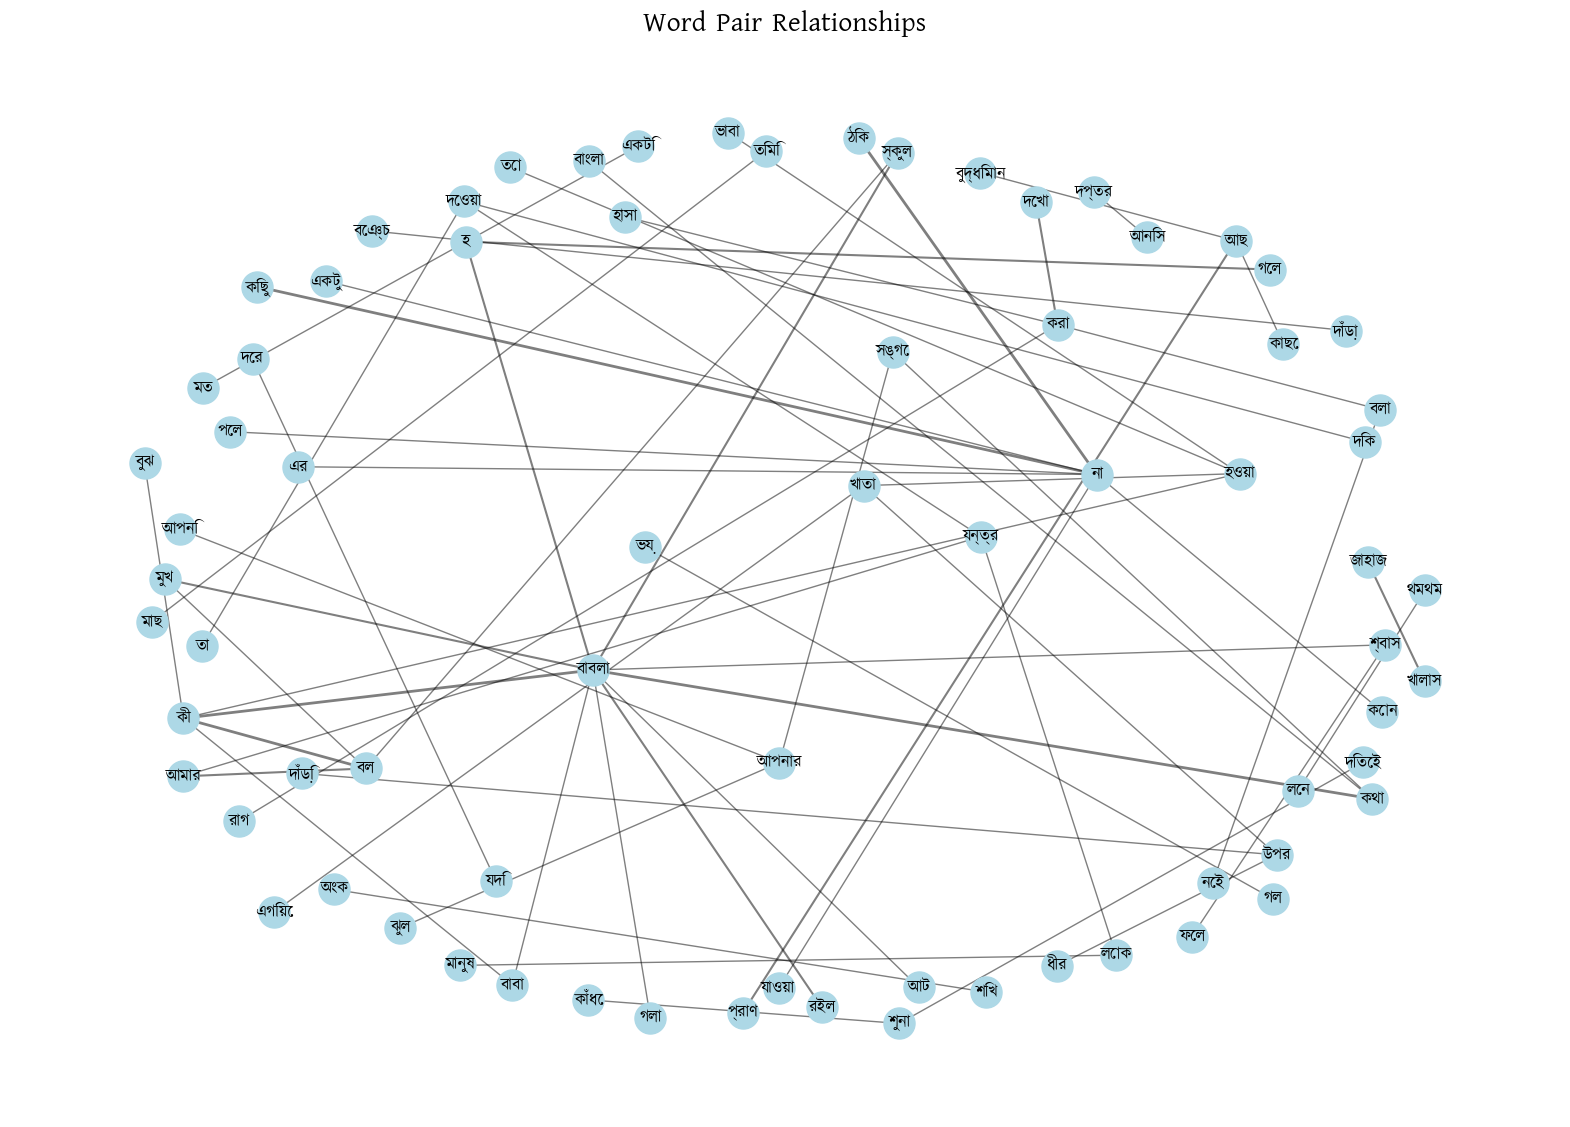

Global Clustering Coefficient: 0.015165165165165166
H-index of the graph: 4


In [400]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()


# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")


# CLIQUE

### Clique Number, Maximal Clique Number, and Maximum Clique in your graph, we can define three new functions:

Clique Number: This is the size of the largest complete subgraph (clique) in the graph, which is essentially the largest number of nodes that are all adjacent to each other.

Maximal Clique Number: This is the size of the largest clique in the graph that cannot be extended by adding any adjacent nodes.

Maximum Clique: This refers to the largest clique (in terms of number of nodes) that exists in the graph.

Total number of nodes: 74


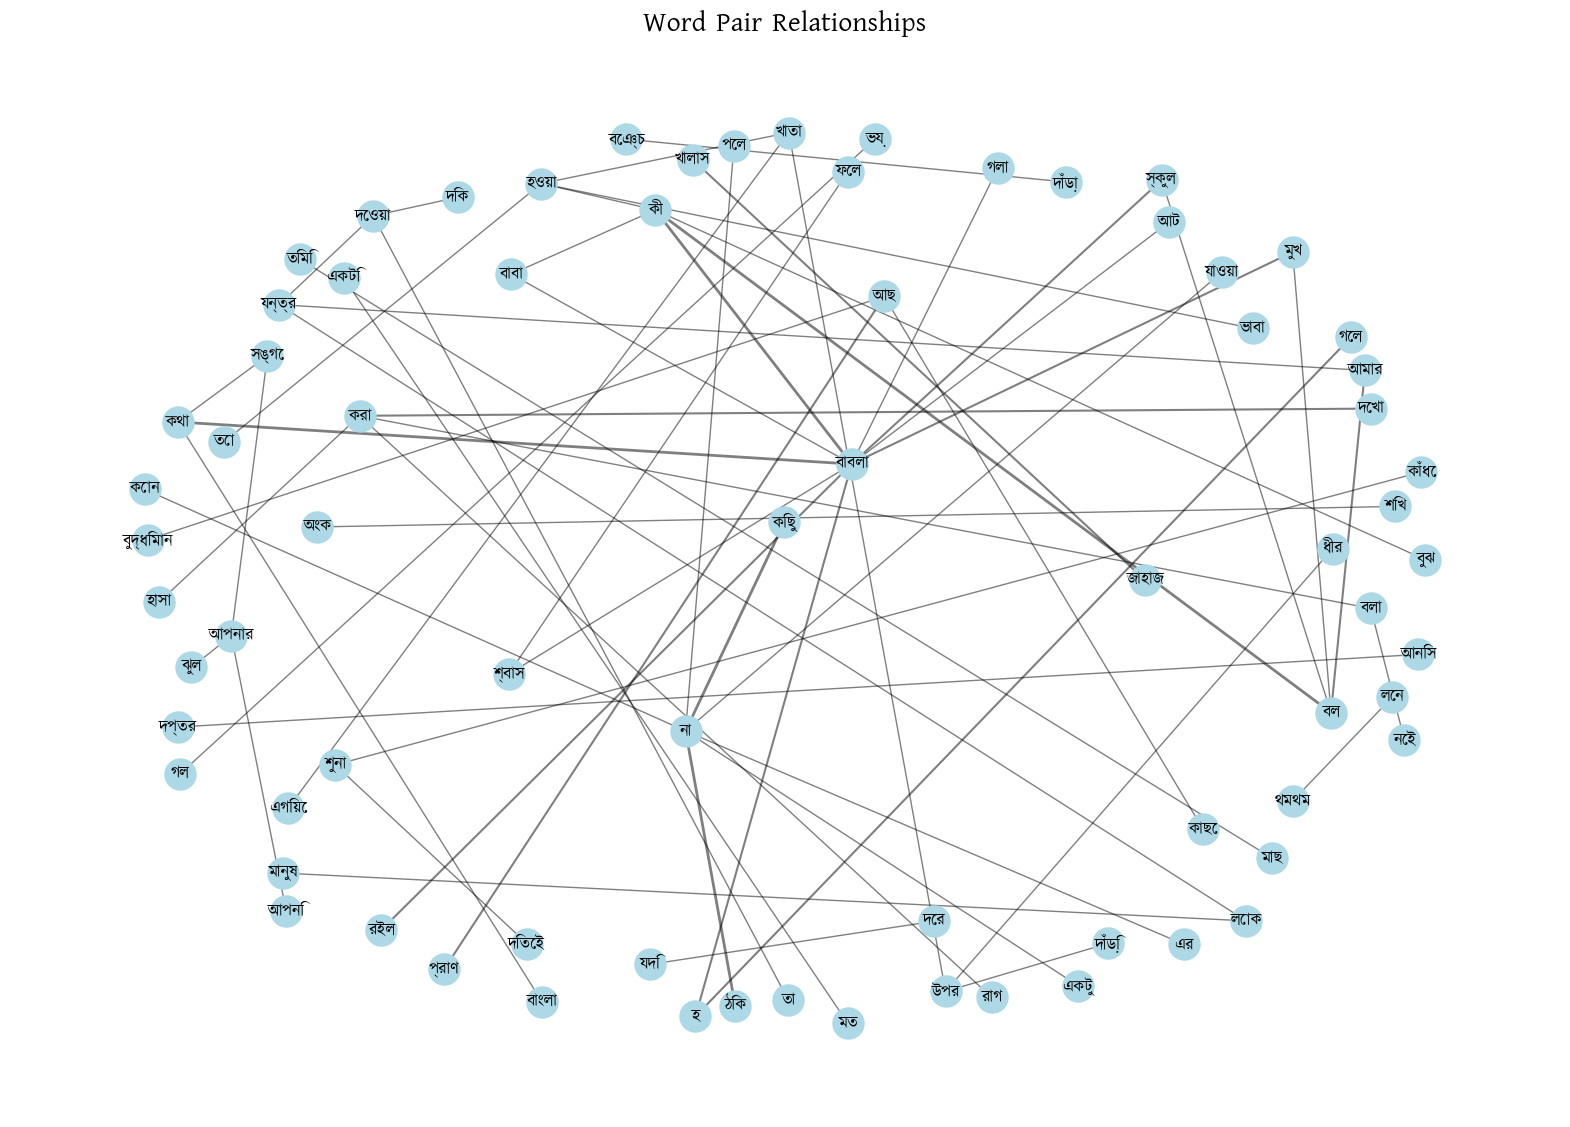

Global Clustering Coefficient: 0.015165165165165166
H-index of the graph: 4
Clique Number: 3
Maximal Clique Number: 3
Maximal Clique Nodes: বাবলা, কী, বাবা
Maximum Clique Number: 3
Maximum Clique Nodes: বাবলা, কী, বাবা


In [402]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to calculate Clique Metrics
def calculate_clique_metrics(G):
    cliques = list(nx.find_cliques(G))

    # Clique Number: Size of the largest clique in the graph
    clique_number = max(len(clique) for clique in cliques) if cliques else 0

    # Maximal Clique Number: Size of the largest maximal clique
    maximal_clique_number = 0
    maximal_clique = []
    for clique in cliques:
        # Check if the subgraph induced by the clique is a complete graph
        subgraph = G.subgraph(clique)
        if len(clique) > maximal_clique_number:
            maximal_clique_number = len(clique)
            maximal_clique = clique

    # Maximum Clique: The actual nodes in the largest clique
    maximum_clique = max(cliques, key=len) if cliques else []

    return clique_number, maximal_clique_number, maximal_clique, maximum_clique

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")

# Calculate Clique Metrics
clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

# Print the clique metrics
print(f"Clique Number: {clique_number}")
print(f"Maximal Clique Number: {maximal_clique_number}")
print(f"Maximal Clique Nodes: {', '.join(maximal_clique)}")
print(f"Maximum Clique Number: {len(maximum_clique)}")
print(f"Maximum Clique Nodes: {', '.join(maximum_clique)}")


Total number of nodes: 74


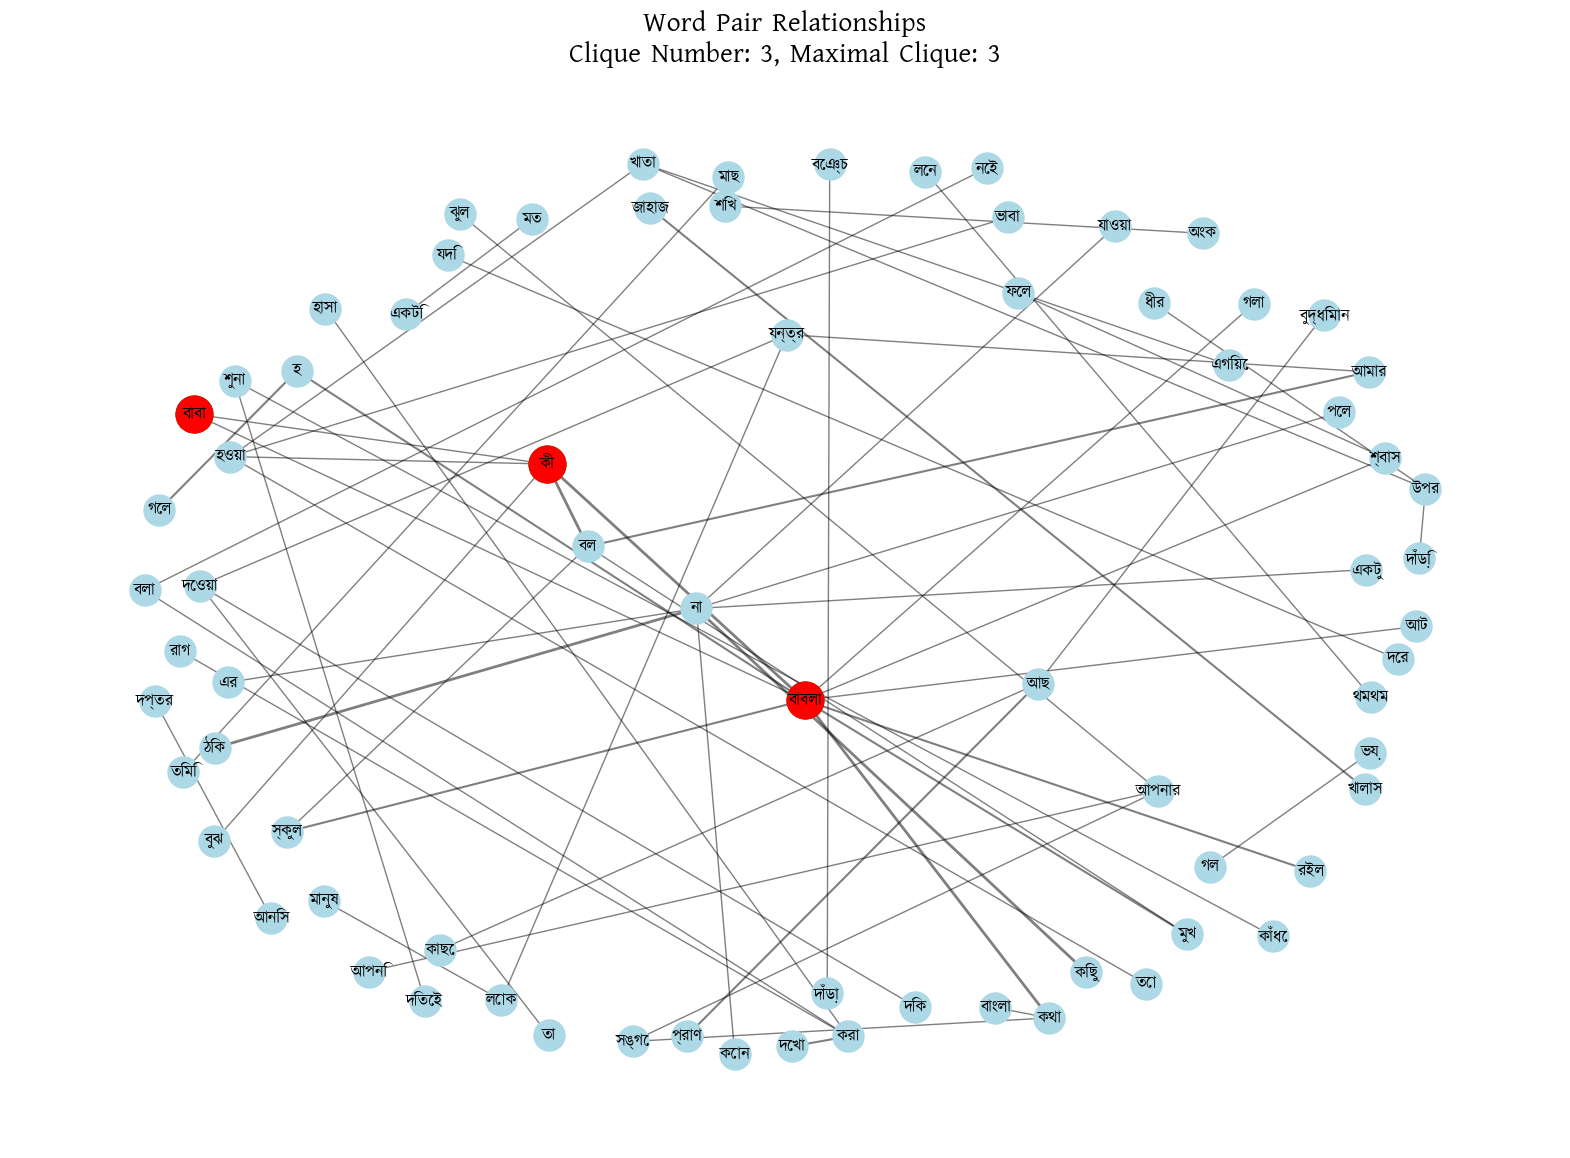

Global Clustering Coefficient: 0.015165165165165166
H-index of the graph: 4
Clique Number: 3
Maximal Clique Number: 3
Maximal Clique Nodes: বাবলা, কী, বাবা
Maximum Clique Number: 3
Maximum Clique Nodes: বাবলা, কী, বাবা


In [403]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to calculate Clique Metrics
def calculate_clique_metrics(G):
    cliques = list(nx.find_cliques(G))

    # Clique Number: Size of the largest clique in the graph
    clique_number = max(len(clique) for clique in cliques) if cliques else 0

    # Maximal Clique Number: Size of the largest maximal clique
    maximal_clique_number = 0
    maximal_clique = []
    for clique in cliques:
        # Check if the subgraph induced by the clique is a complete graph
        subgraph = G.subgraph(clique)
        if len(clique) > maximal_clique_number:
            maximal_clique_number = len(clique)
            maximal_clique = clique

    # Maximum Clique: The actual nodes in the largest clique
    maximum_clique = max(cliques, key=len) if cliques else []

    return clique_number, maximal_clique_number, maximal_clique, maximum_clique

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Calculate clique metrics
    clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

    # Plot the entire graph
    plt.figure(figsize=(20, 14))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Plot the cliques
    if maximum_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximum_clique, node_color='green', node_size=700)
    if maximal_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximal_clique, node_color='red', node_size=700)

    # Set title and axis
    plt.title(f'Word Pair Relationships\nClique Number: {clique_number}, Maximal Clique: {maximal_clique_number}',
              fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")

# Calculate Clique Metrics
clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

# Print the clique metrics
print(f"Clique Number: {clique_number}")
print(f"Maximal Clique Number: {maximal_clique_number}")
print(f"Maximal Clique Nodes: {', '.join(maximal_clique)}")
print(f"Maximum Clique Number: {len(maximum_clique)}")
print(f"Maximum Clique Nodes: {', '.join(maximum_clique)}")


Total number of nodes: 74


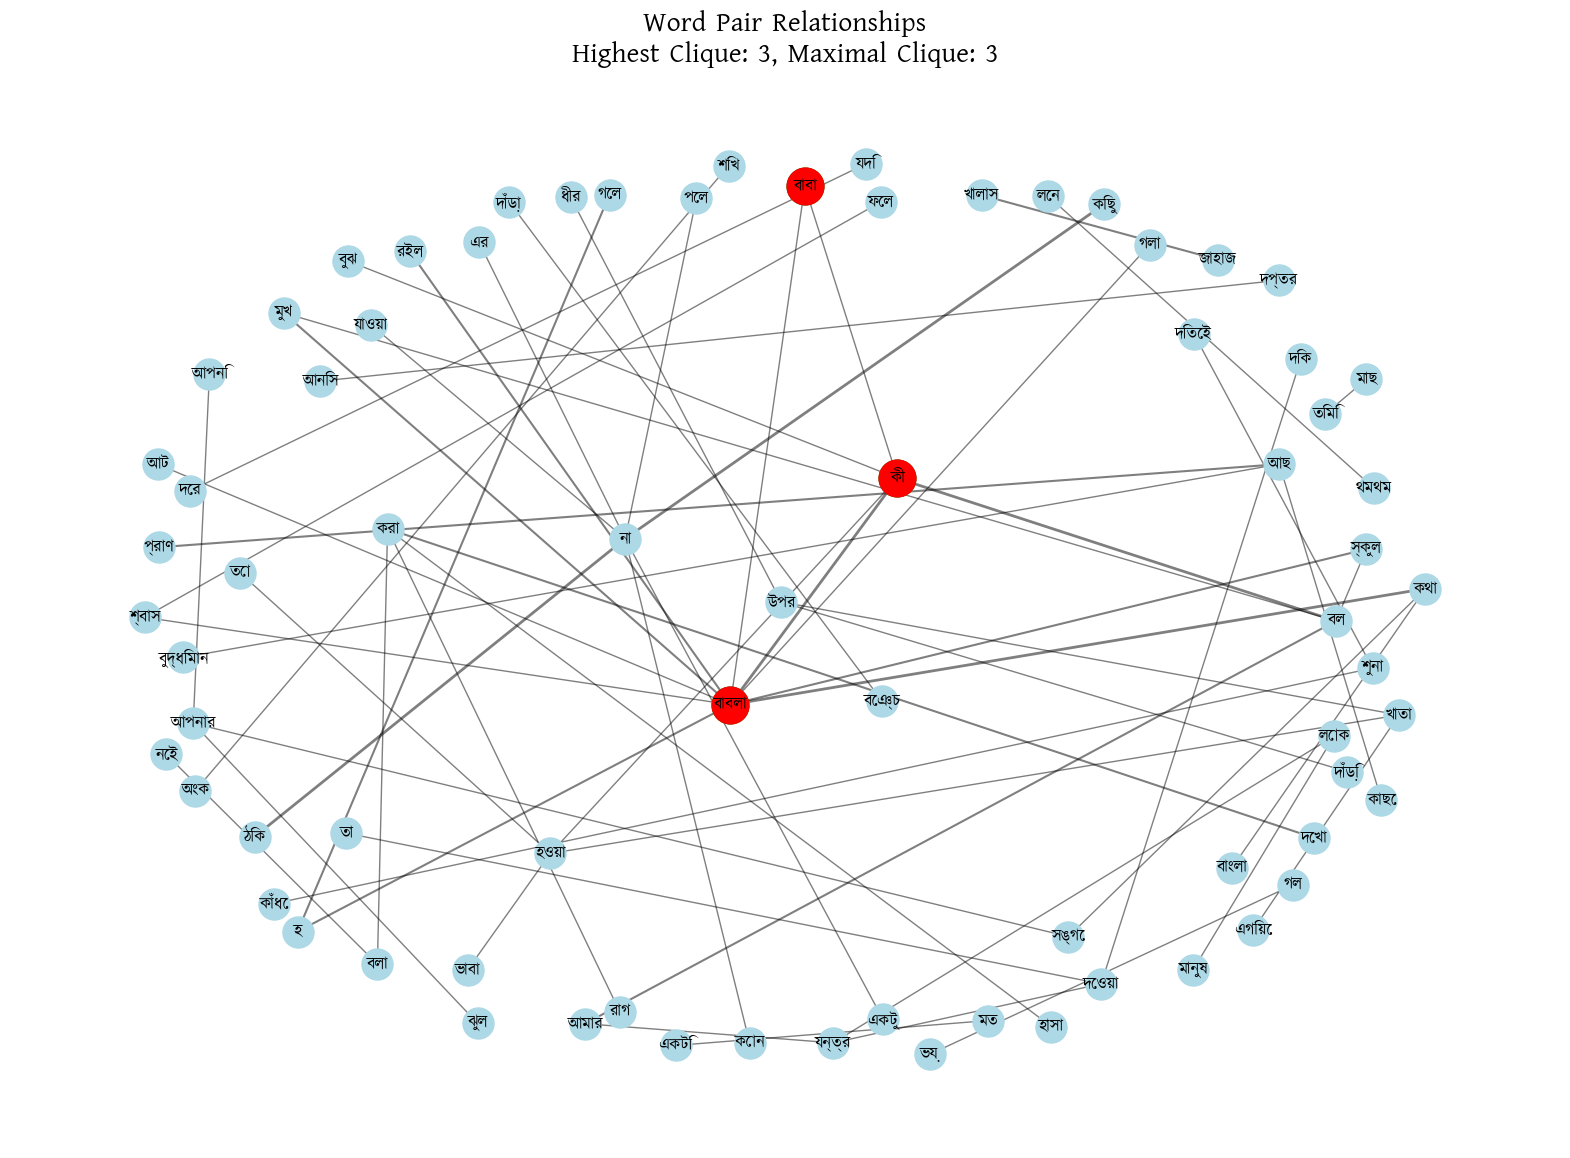

Global Clustering Coefficient: 0.015165165165165166
H-index of the graph: 4
Highest Clique Number: 3
Maximal Clique Number: 3
Maximal Clique Nodes: বাবলা, কী, বাবা
Maximum Clique Number: 3
Maximum Clique Nodes: বাবলা, কী, বাবা


In [407]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to calculate Clique Metrics
def calculate_clique_metrics(G):
    # Get all cliques in the graph
    cliques = list(nx.find_cliques(G))

    # Highest Clique Number: Size of the largest clique in the graph
    highest_clique_number = max(len(clique) for clique in cliques) if cliques else 0

    # Maximum Clique Number: Size of the largest maximal clique
    maximal_clique_number = 0
    maximal_clique = []
    for clique in cliques:
        subgraph = G.subgraph(clique)
        if len(clique) > maximal_clique_number:
            maximal_clique_number = len(clique)
            maximal_clique = clique

    # Maximum Clique: The actual nodes in the largest clique (highest clique size)
    maximum_clique = max(cliques, key=len) if cliques else []

    return highest_clique_number, maximal_clique_number, maximal_clique, maximum_clique

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Calculate clique metrics
    highest_clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

    # Plot the entire graph
    plt.figure(figsize=(20, 14))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Plot the cliques
    if maximum_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximum_clique, node_color='green', node_size=700)
    if maximal_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximal_clique, node_color='red', node_size=700)

    # Set title and axis
    plt.title(f'Word Pair Relationships\nHighest Clique: {highest_clique_number}, Maximal Clique: {maximal_clique_number}',
              fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")

# Calculate Clique Metrics
highest_clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

# Print the clique metrics
print(f"Highest Clique Number: {highest_clique_number}")
print(f"Maximal Clique Number: {maximal_clique_number}")
print(f"Maximal Clique Nodes: {', '.join(maximal_clique)}")
print(f"Maximum Clique Number: {len(maximum_clique)}")
print(f"Maximum Clique Nodes: {', '.join(maximum_clique)}")
